# Assignment 3 specification

The purpose of this assignment is to analyse the factors that might lead to (increased) consumption of both legal and illegal drugs. The data set is hosted on the UCI repository of datasets for machine learning.

The dataset is provided with this notebook as a zip file.

For your conveninece, code is provide below to read the data into the dataframe, and this notebook is setup so that students ar prompted to complete the tasks.


Students are asked to

1. Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction. __[20 marks]__
2. For a decision tree classifier and any other classifier of your choosing, use the data description provided [here](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use. __[20 marks]__
   - When comparing between the classifiers, students should consider a wide range of classification metrics, not just one.
3. Use the same procedure as Task 2 to predict the following targets: caffeine, cocaine and heroin. Which "drug" (addictive substance) is the easiest to predict accurately, and why? __[25 marks]__
   - When comparing across the targets, students should consider a wide range of classification metrics, not just one.
4. Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study. __[35 marks]__

# Notes on running this notebook. 

This notebook can be run using the `data-mining` anaconda environment created at the beginning of the semester. 

This environment is a regular anaconda environment with the following packages added: `dtale`, `voila`, `feature-tools`, `graphviz`, `pydot`, `ipywidgets`, `phik`, `pingouin`, `imbalanced-learn`, `gower` (pip install).

The Python version of this environment is `3.11.5`.

This notebook is designed to be ran all at once. Avoid running cells out of order or multiple times.

# Libraries imports

In [232]:
# core data science libraries
import numpy as np
import pandas as pd

# statistical modules
import scipy.stats as stats 
import statsmodels.api as sm 
import pingouin as pg

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# matplotlib magic to show plots inline
%matplotlib inline

#plots style
sns.set_style('darkgrid')
plt.style.use("seaborn-darkgrid")

/var/folders/dt/58d383mx6m5glpsgpmmsbj_80000gn/T/ipykernel_44176/2161359890.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


# Task 1: Read the data and split it into training and test datasets. Perform 3-pass EDA on this data, to learn about its structure and to assess which features might be suitable for prediction.

Let's start by reading in the data, and splitting it right away into training and test sets. We will use the training set for EDA and building models, and the test set for model evaluation. The transformations applied to the training set will be applied to the test set as well (when needed).

*I will not use the ID column provided as it serves no purpose, so using the default index is easier as the ID column does not start at 0. As I sometimes reset indexes for joining purposes, it makes more sense to start with a classic index.*

In [233]:
df = pd.read_csv('data/Drug_Consumption.csv').drop(columns=['ID'])
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [234]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

Before splitting, we will just make the columns names a bit more readable and to put the right datatypes.

In [235]:
df.rename(columns={'Nscore':'Neuroticism', 'Escore':'Extraversion', 'Oscore':'Openness', 'AScore':'Agreeableness', 'Cscore':'Conscientiousness', 'SS':'SensationSeeking', 'Caff':'Caffeine', 'Choc':'Chocolate','Semer':'Semeron'}, inplace=True)
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism',
       'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness',
       'Impulsive', 'SensationSeeking', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
       'Caffeine', 'Cannabis', 'Chocolate', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Semeron', 'VSA'],
      dtype='object')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1884 non-null   object 
 1   Gender             1884 non-null   object 
 2   Education          1884 non-null   object 
 3   Country            1884 non-null   object 
 4   Ethnicity          1884 non-null   object 
 5   Neuroticism        1884 non-null   float64
 6   Extraversion       1884 non-null   float64
 7   Openness           1884 non-null   float64
 8   Agreeableness      1884 non-null   float64
 9   Conscientiousness  1884 non-null   float64
 10  Impulsive          1884 non-null   float64
 11  SensationSeeking   1884 non-null   float64
 12  Alcohol            1884 non-null   object 
 13  Amphet             1884 non-null   object 
 14  Amyl               1884 non-null   object 
 15  Benzos             1884 non-null   object 
 16  Caffeine           1884 

Regarding data types : 
- All character traits columns are already numerical, so they should be easy to work with.
- Targets are objects, they are actually ordinal categorical variables, but we will convert them right now to numerical values for convenience (this way we can use a wider range of visualisations, do feature engineering more easily, and it makes it easy to use the actual labels instead of the ones in the dataset). They will of course still be treated as categorical targets when building models.
- `Country`, `Gender`, and `Ethnicity` simply need to be converted to categorical variables.
- `Age` and `Education` need to be converted to ordinal categorical variables.
- EDA will help us in deciding how to handle the last 5 features mentioned for building models. Feature engineering will be performed in the model building section.

In [237]:
targets = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']
models_targets = ['Alcohol', 'Caffeine', 'Coke', 'Heroin']
numericals = ['Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsive', 'SensationSeeking']
categoricals = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
features = numericals + categoricals

targets_levels = ["Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"]

df[targets] = df[targets].replace(['CL0', 'CL1', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'], [0,1,2,3,4,5,6]).astype(int)
df[['Country', 'Gender', 'Ethnicity']] = df[['Country', 'Gender', 'Ethnicity']].astype('category')
df['Age'] = pd.Categorical(df['Age'], categories=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], ordered=True)
df['Education'] = pd.Categorical(df['Education'], categories=['Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years', 'Left school at 18 years', 'Some college or university, no certificate or degree', 'Professional certificate/ diploma', 'University degree', 'Masters degree', 'Doctorate degree'], ordered=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                1884 non-null   category
 1   Gender             1884 non-null   category
 2   Education          1884 non-null   category
 3   Country            1884 non-null   category
 4   Ethnicity          1884 non-null   category
 5   Neuroticism        1884 non-null   float64 
 6   Extraversion       1884 non-null   float64 
 7   Openness           1884 non-null   float64 
 8   Agreeableness      1884 non-null   float64 
 9   Conscientiousness  1884 non-null   float64 
 10  Impulsive          1884 non-null   float64 
 11  SensationSeeking   1884 non-null   float64 
 12  Alcohol            1884 non-null   int64   
 13  Amphet             1884 non-null   int64   
 14  Amyl               1884 non-null   int64   
 15  Benzos             1884 non-null   int64   
 16  Caffei

Perfect.

*I do not show all the steps used to make sure that transformations are done without error (e.g. incorrect mapping for targets) to keep the notebook concise and interesting, but just know that I try to check everything I do.*

We can now split our dataset, keeping 20% of the data for testing purposes.

In [238]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)
print(f"Train set shape: {train_set.shape}, test set shape: {test_set.shape}")

Train set shape: (1507, 31), test set shape: (377, 31)


## 1.1 First pass : data inspection and initial clean

From now on we will use the training set only for EDA. We will start by inspecting the dataset.

In [239]:
train_set.tail()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
1502,35-44,M,Professional certificate/ diploma,Australia,White,-1.32828,0.16767,1.65653,1.11406,0.25953,...,3,0,0,3,3,0,3,6,0,0
1503,35-44,F,University degree,USA,White,-2.05048,0.47617,0.58331,-1.34289,-0.52745,...,1,0,0,3,1,6,1,6,0,0
1504,18-24,M,"Some college or university, no certificate or ...",Canada,White,-1.86962,1.28610,2.15324,0.76096,0.93949,...,0,0,0,3,5,2,3,5,0,0
1505,18-24,M,"Some college or university, no certificate or ...",USA,White,-1.19430,0.80523,0.88309,0.94156,0.41594,...,0,0,0,0,5,0,4,0,0,0
1506,18-24,M,"Some college or university, no certificate or ...",Other,White,-1.55078,-1.23177,0.88309,1.61108,-1.78169,...,0,0,3,3,3,3,4,5,0,0


We have no extraneous values at the end of the file and the dataset contains no null values, that is great.

In [240]:
train_set.isna().sum()

Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsive            0
SensationSeeking     0
Alcohol              0
Amphet               0
Amyl                 0
Benzos               0
Caffeine             0
Cannabis             0
Chocolate            0
Coke                 0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legalh               0
LSD                  0
Meth                 0
Mushrooms            0
Nicotine             0
Semeron              0
VSA                  0
dtype: int64

We have no missing values either. We will address outliers in pass 2 if some need to be addressed.

Just a last thing before we move on, we need to check for overclaimers with the fictive drug `Semeron`.

In [241]:
train_set.Semeron.map(lambda x: targets_levels[x]).value_counts()

Never Used                1499
Used in Last Decade          3
Used over a Decade Ago       2
Used in Last Year            2
Used in Last Month           1
Name: Semeron, dtype: int64

We can see that that almost all users have answered `Never` to the question about `Semeron`, and a few said having consummed it a long time ago which is likely only an error from their part (mixing drugs names) rather than an overclaim. We only have one participant that says having used it within the last month but it could still be an error and in all cases it will not affect our models.

## 1.2 Second pass : Individuals features and targets

Now, we will look at the distributions/counts of our features (first) and targets (second). 

### 1.2.1 Numerical features

In [242]:
train_set.describe()

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsive,SensationSeeking,Alcohol,Amphet,Amyl,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,...,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000
mean,-0.010473,0.013453,-0.003042,0.004589,-0.015193,0.010895,0.004903,4.641009,1.351029,0.621102,...,1.358328,0.379562,0.585269,1.373590,1.098208,0.838752,1.203052,3.238885,0.011944,0.431321
std,0.989665,1.004161,0.983388,0.983960,1.004759,0.961527,0.963026,1.336182,1.784414,1.065781,...,1.667298,1.050166,1.235754,1.786155,1.517377,1.650348,1.468995,2.424970,0.178128,0.959900
min,-2.756960,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,0.629670,0.637790,0.723300,0.590420,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,...,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


Neuroticism             AxesSubplot(0.125,0.53;0.168478x0.35)
Extraversion         AxesSubplot(0.327174,0.53;0.168478x0.35)
Openness             AxesSubplot(0.529348,0.53;0.168478x0.35)
Agreeableness        AxesSubplot(0.731522,0.53;0.168478x0.35)
Conscientiousness       AxesSubplot(0.125,0.11;0.168478x0.35)
Impulsive            AxesSubplot(0.327174,0.11;0.168478x0.35)
SensationSeeking     AxesSubplot(0.529348,0.11;0.168478x0.35)
dtype: object

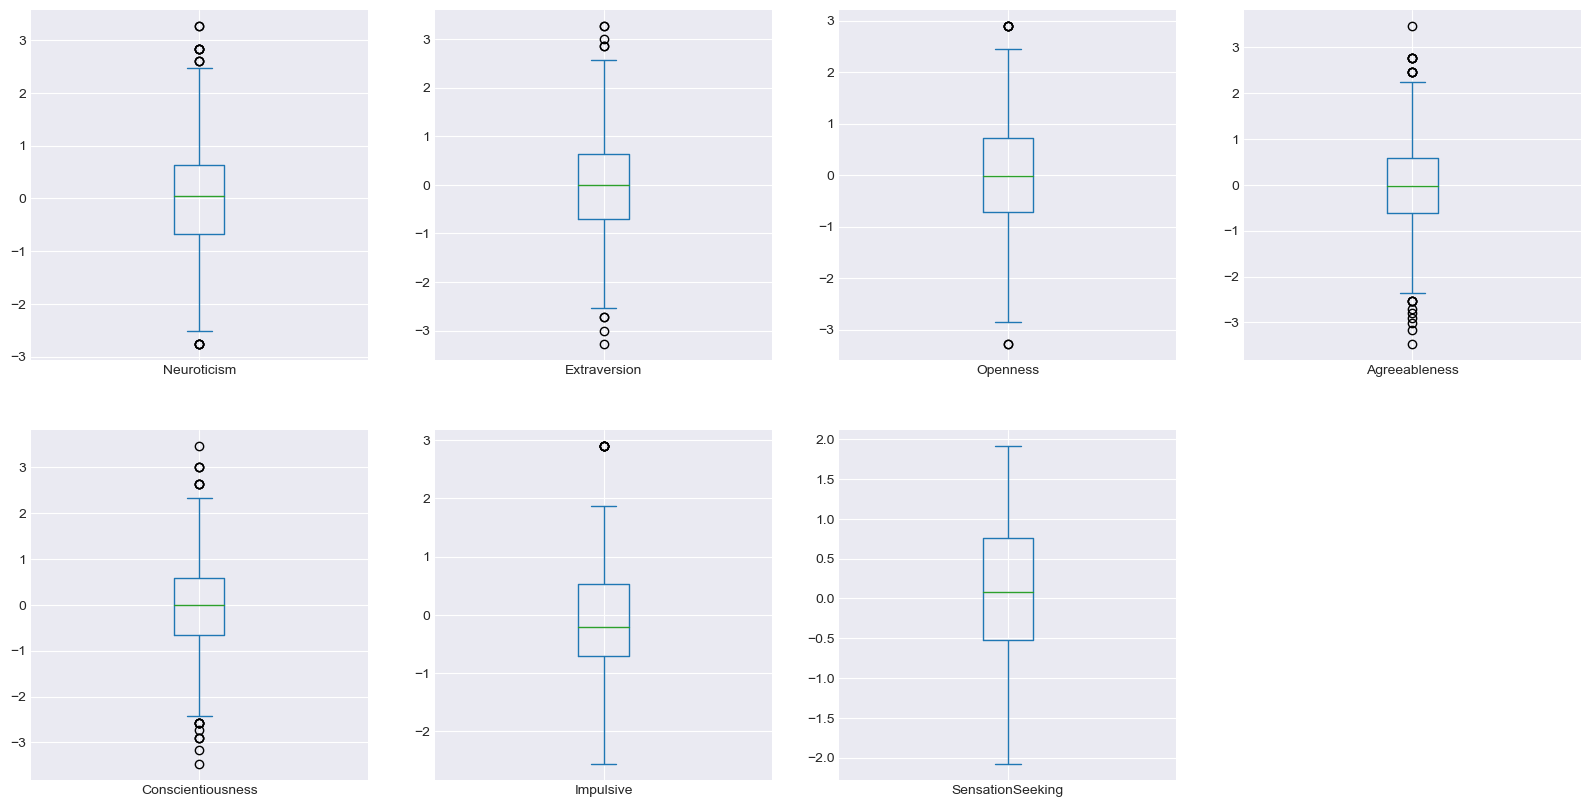

In [243]:
train_set[numericals].plot(kind='box', subplots=True, layout=(2,4), figsize=(20,10), sharex=False, sharey=False)

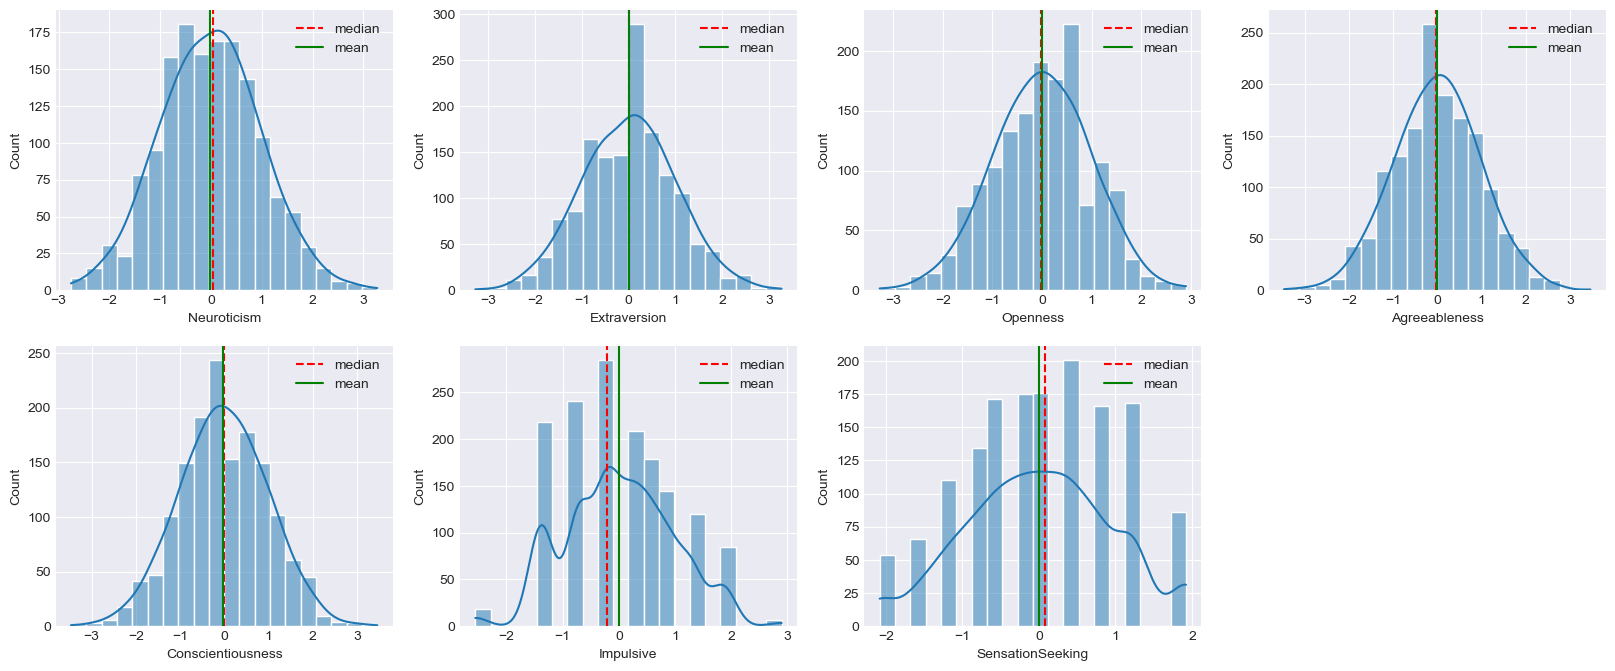

In [244]:
fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 8))
for column, ax in zip(numericals, axes.flatten()):
    sns.histplot(train_set[column], kde=True, ax=ax, bins=20)
    # plot median and mean as vertical lines
    ax.axvline(train_set[column].median(), color='r', linestyle='--', label='median')
    ax.axvline(train_set[column].mean(), color='g', linestyle='-', label='mean')
    ax.legend()
fig.delaxes(axes[1][3])

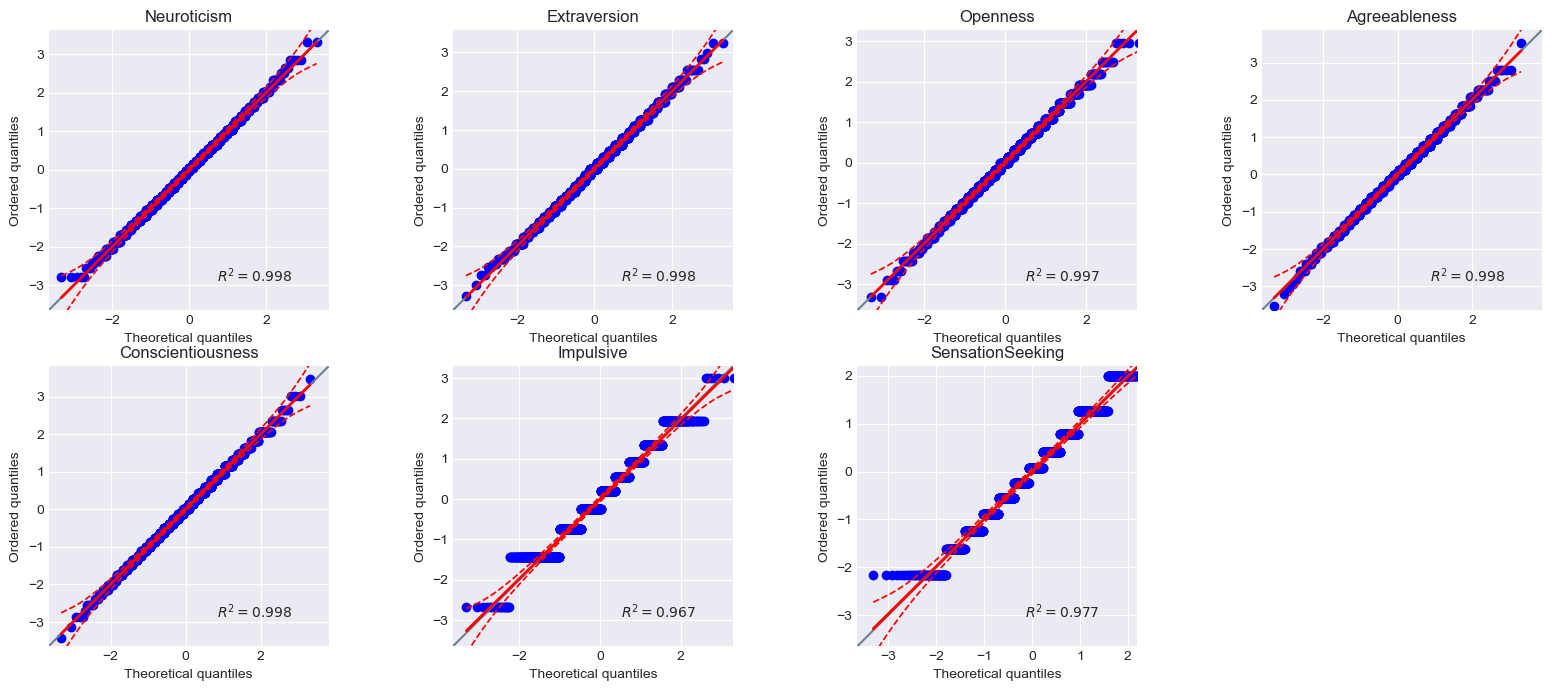

In [245]:
fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 8))
for column, ax in zip(numericals, axes.flatten()):
    pg.qqplot(train_set[column], dist='norm', ax=ax)
    ax.set_title(column)
fig.delaxes(axes[1][3])

We can see that all our numerical features (character traits) are almost normally distributed and have similar ranges. Also, tehre are no big outliers. So far, this is ideal for building models.

### 1.2.2 Categorical features

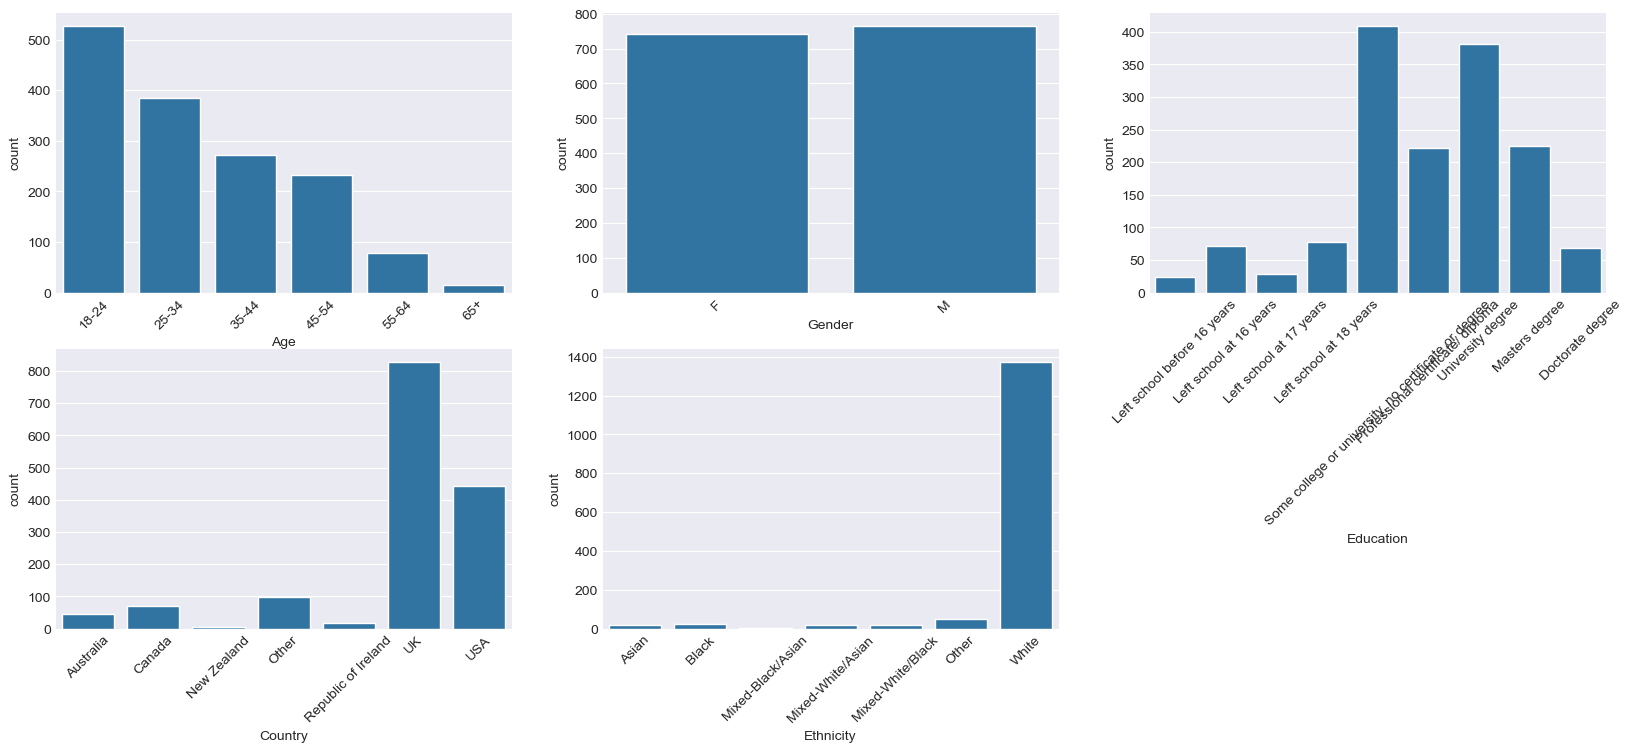

In [246]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 8))
for column, ax in zip(categoricals, axes.flatten()):
    sns.countplot(x=column, data=train_set, ax=ax)
    ax.tick_params(axis='x', labelrotation=45)
fig.delaxes(axes[1][2])

A few remarks regarding some feature engineering we might need to perform in the next phase (while building models, we will use forwards selection to decide which features to keep, so we can try many different approaches):
- `Gender` is very well balanced, no need to worry about it.
- `Ethnicity` is very imbalanced with `White` being the most common category by far. We might try to group some categories together if that makes sense (same relationship to target) to reduce the number of categories, but we need to be careful as these relationships might just be "luck" if we have few observations for the category. We might not use it at all unless it makes sense to group all other categories together as it would give a decent amount of observations for the "other" category. We will see that in the third pass.
- `Country` is also very imbalanced with two majority classes (`UK` and `USA`), we will see in the third pass if we can group some categories together (e.g. `USA` and `Canada` as possibly close in terms of culture etc.).
- `Education` is quite imbalanced as well but first since it is ordianal, it might be possible to treat it as numerical and find a linear or quadratic relationship, and we could also group some categories together (we still need to verify it in third pass but it seems to make sense) like people who left school before college.
- `Age` has decreasing counts for higher ages but it can also be treated as numerical if we find a relationship that makes sense and we could potentially group higher categories together if that makes sense.

### 1.2.3 Targets

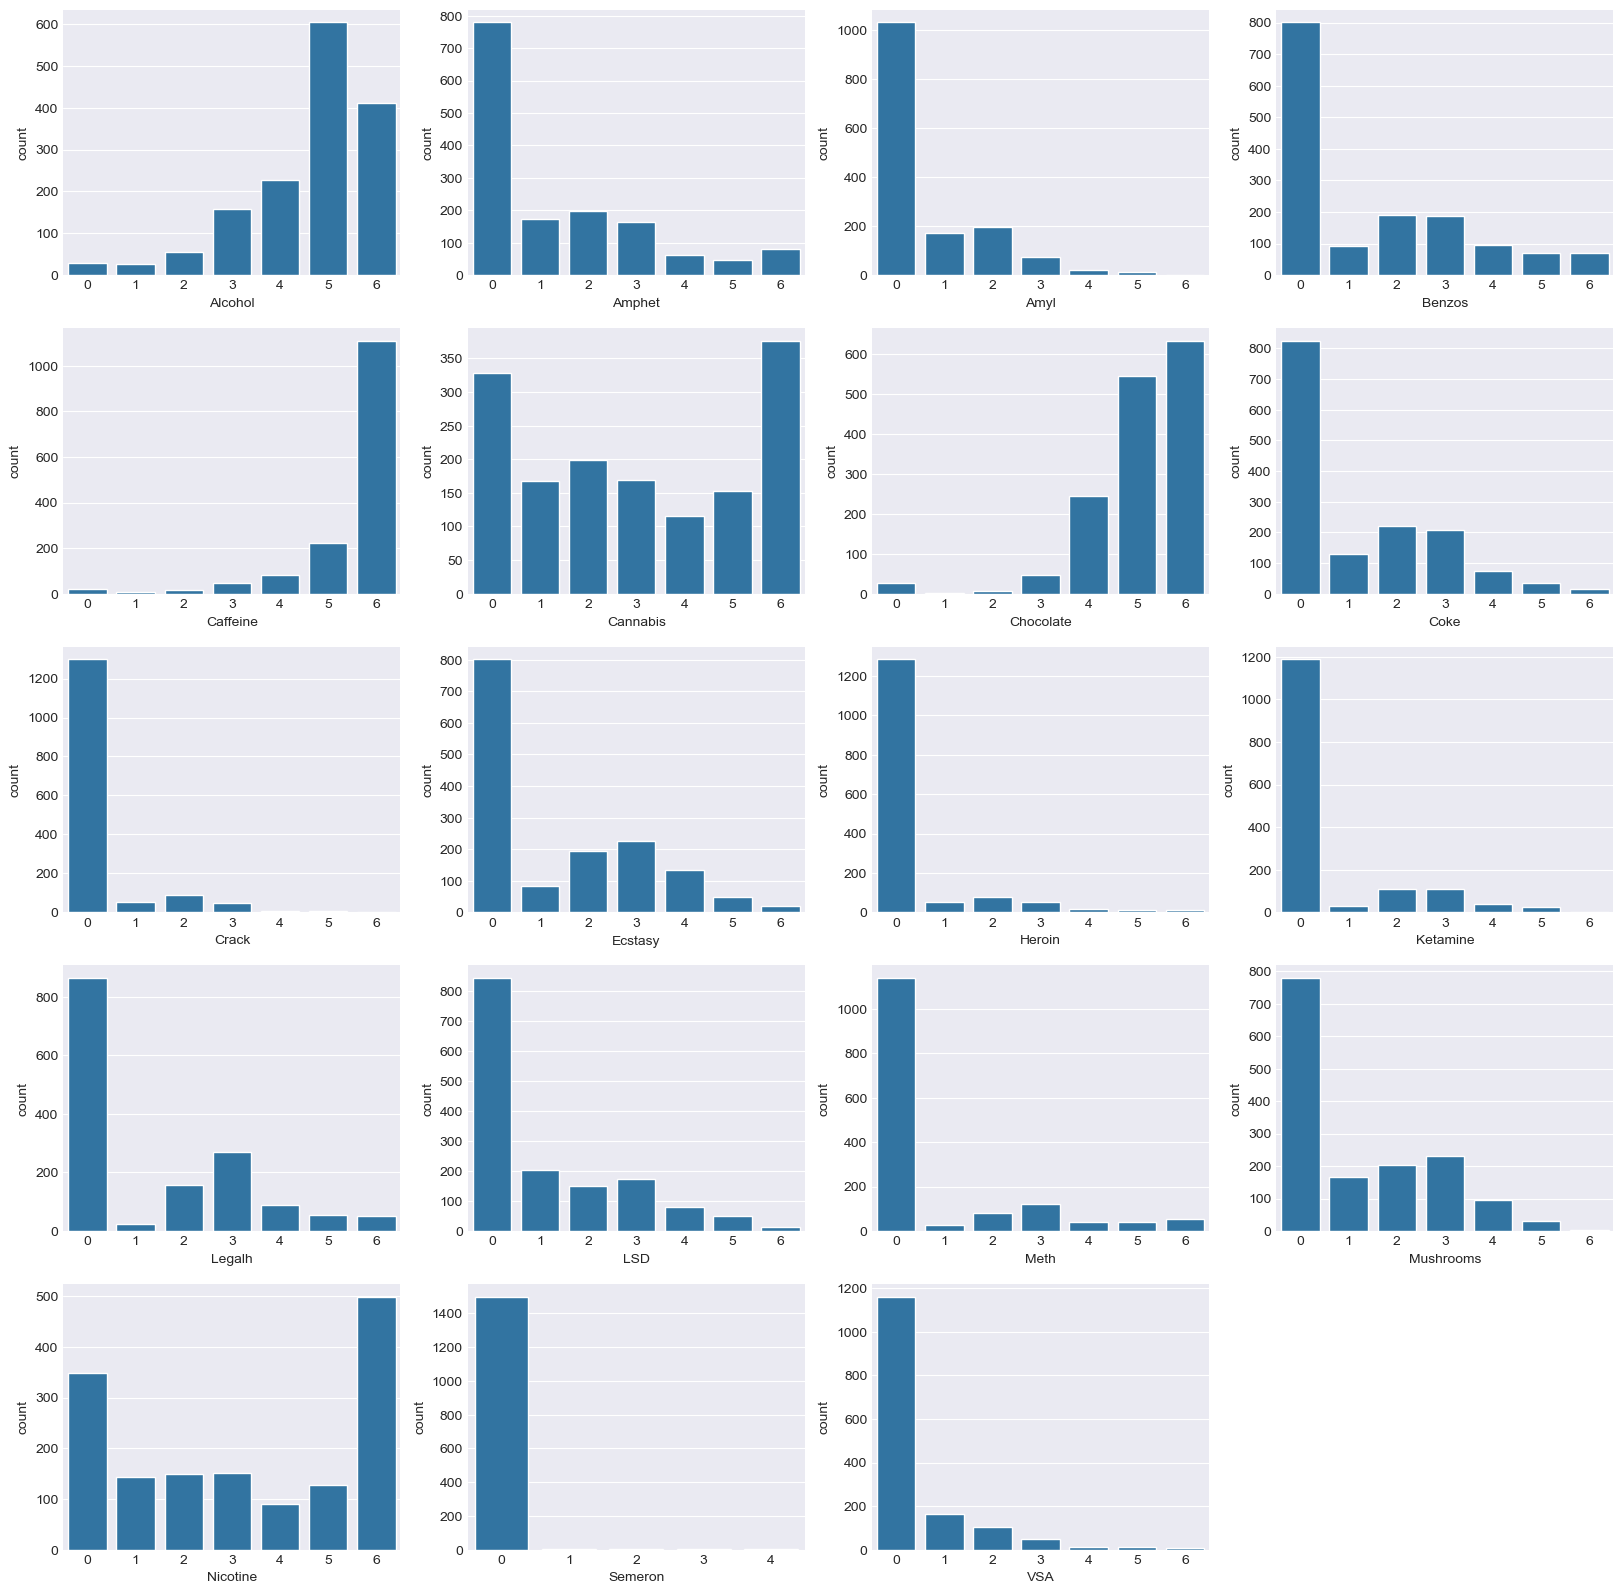

In [247]:
fig, axes = plt.subplots(5, 4, sharex=False, sharey=False, figsize=(20, 20))
for column, ax in zip(targets, axes.flatten()):
    sns.countplot(x=column, data=train_set, ax=ax)
fig.delaxes(axes[4][3])

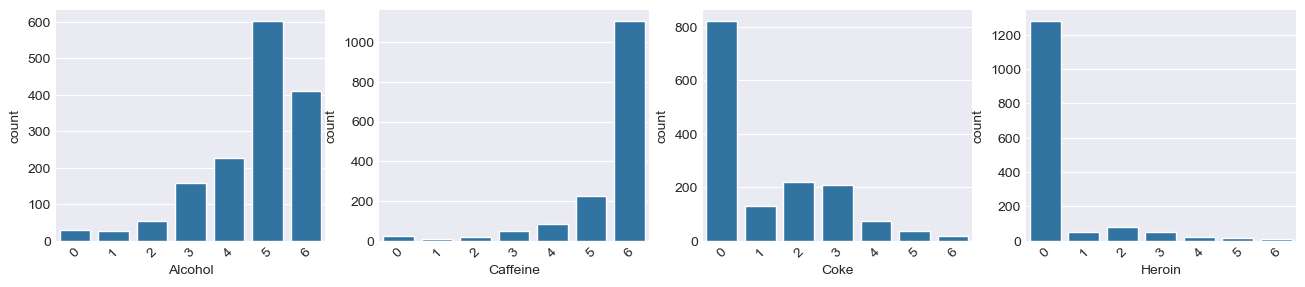

In [248]:
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(16, 3))
for column, ax in zip(models_targets, axes):
    sns.countplot(x=column, data=train_set, ax=ax)
    ax.tick_params(axis='x', labelrotation=45)

I will not comment on each targte as we will only use 4 of them (`Alcohol`, `Caffeine`, `Coke` and `Heroin`) but we can see that there is great variation is the way there consuption is distributed. Thankfully, most "hard" drugs are very imbalanced with most participants having never tried them. However, quite surprinsingly, there are more people who consummed `Cannabis` in the last day than people who never tried it and `Cannabis` is quite balanced (it would certainly be a good target for prediction, and grouping the "interior categories" to have maybe 4 final categories might make prediction even easier).

*Side note : while grouping some categories (e.g. frequent users, occasional users, not users) of the targets might benefit us, especially with the most imbalanced ones, I will assume we have to keep the targets as they are as the specification does not mention that we can do otherwise.*

Alcohol is likely to be the easiest ones to predict as it is the less imbalanced, however we cannot be sure as alcohol is quite common and might have less of a relationship with predictors (maybe every "type of person" drinks it). The other 3 targets are very imbalanced and would for sure benefit from grouping categories together, we will for sure need to use other metrics than accuracy to judge our models as a model which simply predicts the majority class would have a good accuracy. One metric (among others) that we can use (we will use that for forward selection and hyperparameter tuning) is macro F1 score as it gives equal importance to all classes.

## 1.3 Third pass : Relationships between features and targets

In [249]:
corrs = train_set[numericals+models_targets].corr()
corrs

,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsive,SensationSeeking,Alcohol,Caffeine,Coke,Heroin
Neuroticism,1.000000,-0.438832,-0.000098,-0.186852,-0.383548,0.167586,0.073167,-0.011380,0.019189,0.127152,0.163648
Extraversion,-0.438832,1.000000,0.241460,0.151974,0.311258,0.117163,0.214053,0.095182,0.047660,0.034658,-0.091501
Openness,-0.000098,0.241460,1.000000,0.047245,-0.061751,0.282303,0.423097,0.030443,0.014645,0.182224,0.134301
Agreeableness,-0.186852,0.151974,0.047245,1.000000,0.247320,-0.213002,-0.196462,-0.011170,-0.027640,-0.181895,-0.163180
Conscientiousness,-0.383548,0.311258,-0.061751,0.247320,1.000000,-0.320310,-0.218867,-0.014024,-0.045154,-0.177458,-0.146028
Impulsive,0.167586,0.117163,0.282303,-0.213002,-0.320310,1.000000,0.615297,0.036729,0.047680,0.244858,0.179345
SensationSeeking,0.073167,0.214053,0.423097,-0.196462,-0.218867,0.615297,1.000000,0.088283,0.045789,0.335708,0.192665
Alcohol,-0.011380,0.095182,0.030443,-0.011170,-0.014024,0.036729,0.088283,1.000000,0.132322,0.094110,-0.026810
Caffeine,0.019189,0.047660,0.014645,-0.027640,-0.045154,0.047680,0.045789,0.132322,1.000000,0.081184,0.014912
Coke,0.127152,0.034658,0.182224,-0.181895,-0.177458,0.244858,0.335708,0.094110,0.081184,1.000000,0.422449


<AxesSubplot: >

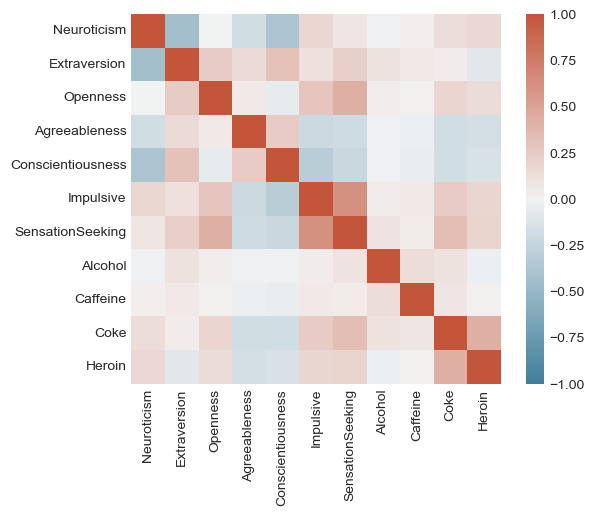

In [250]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corrs, square=True, vmin=-1, vmax=1, cmap=cmap)

We can see that the relationships between features are stronger than the relationships between features and targets, this is not particularly good. Even if that is the case, the correlations between features are not extremely high (maximum of -0.47 for `Neuroticism` and `Extraversion`) though. 

Also we can see that alcool and caffeine are uncorrelated with all features and that correlations with `Coke` and `Heroin` are similar (they are also quite low but not inexistant). 

To see if the relationships are not linear which could explain low correlations, we can plot the targets against the features.

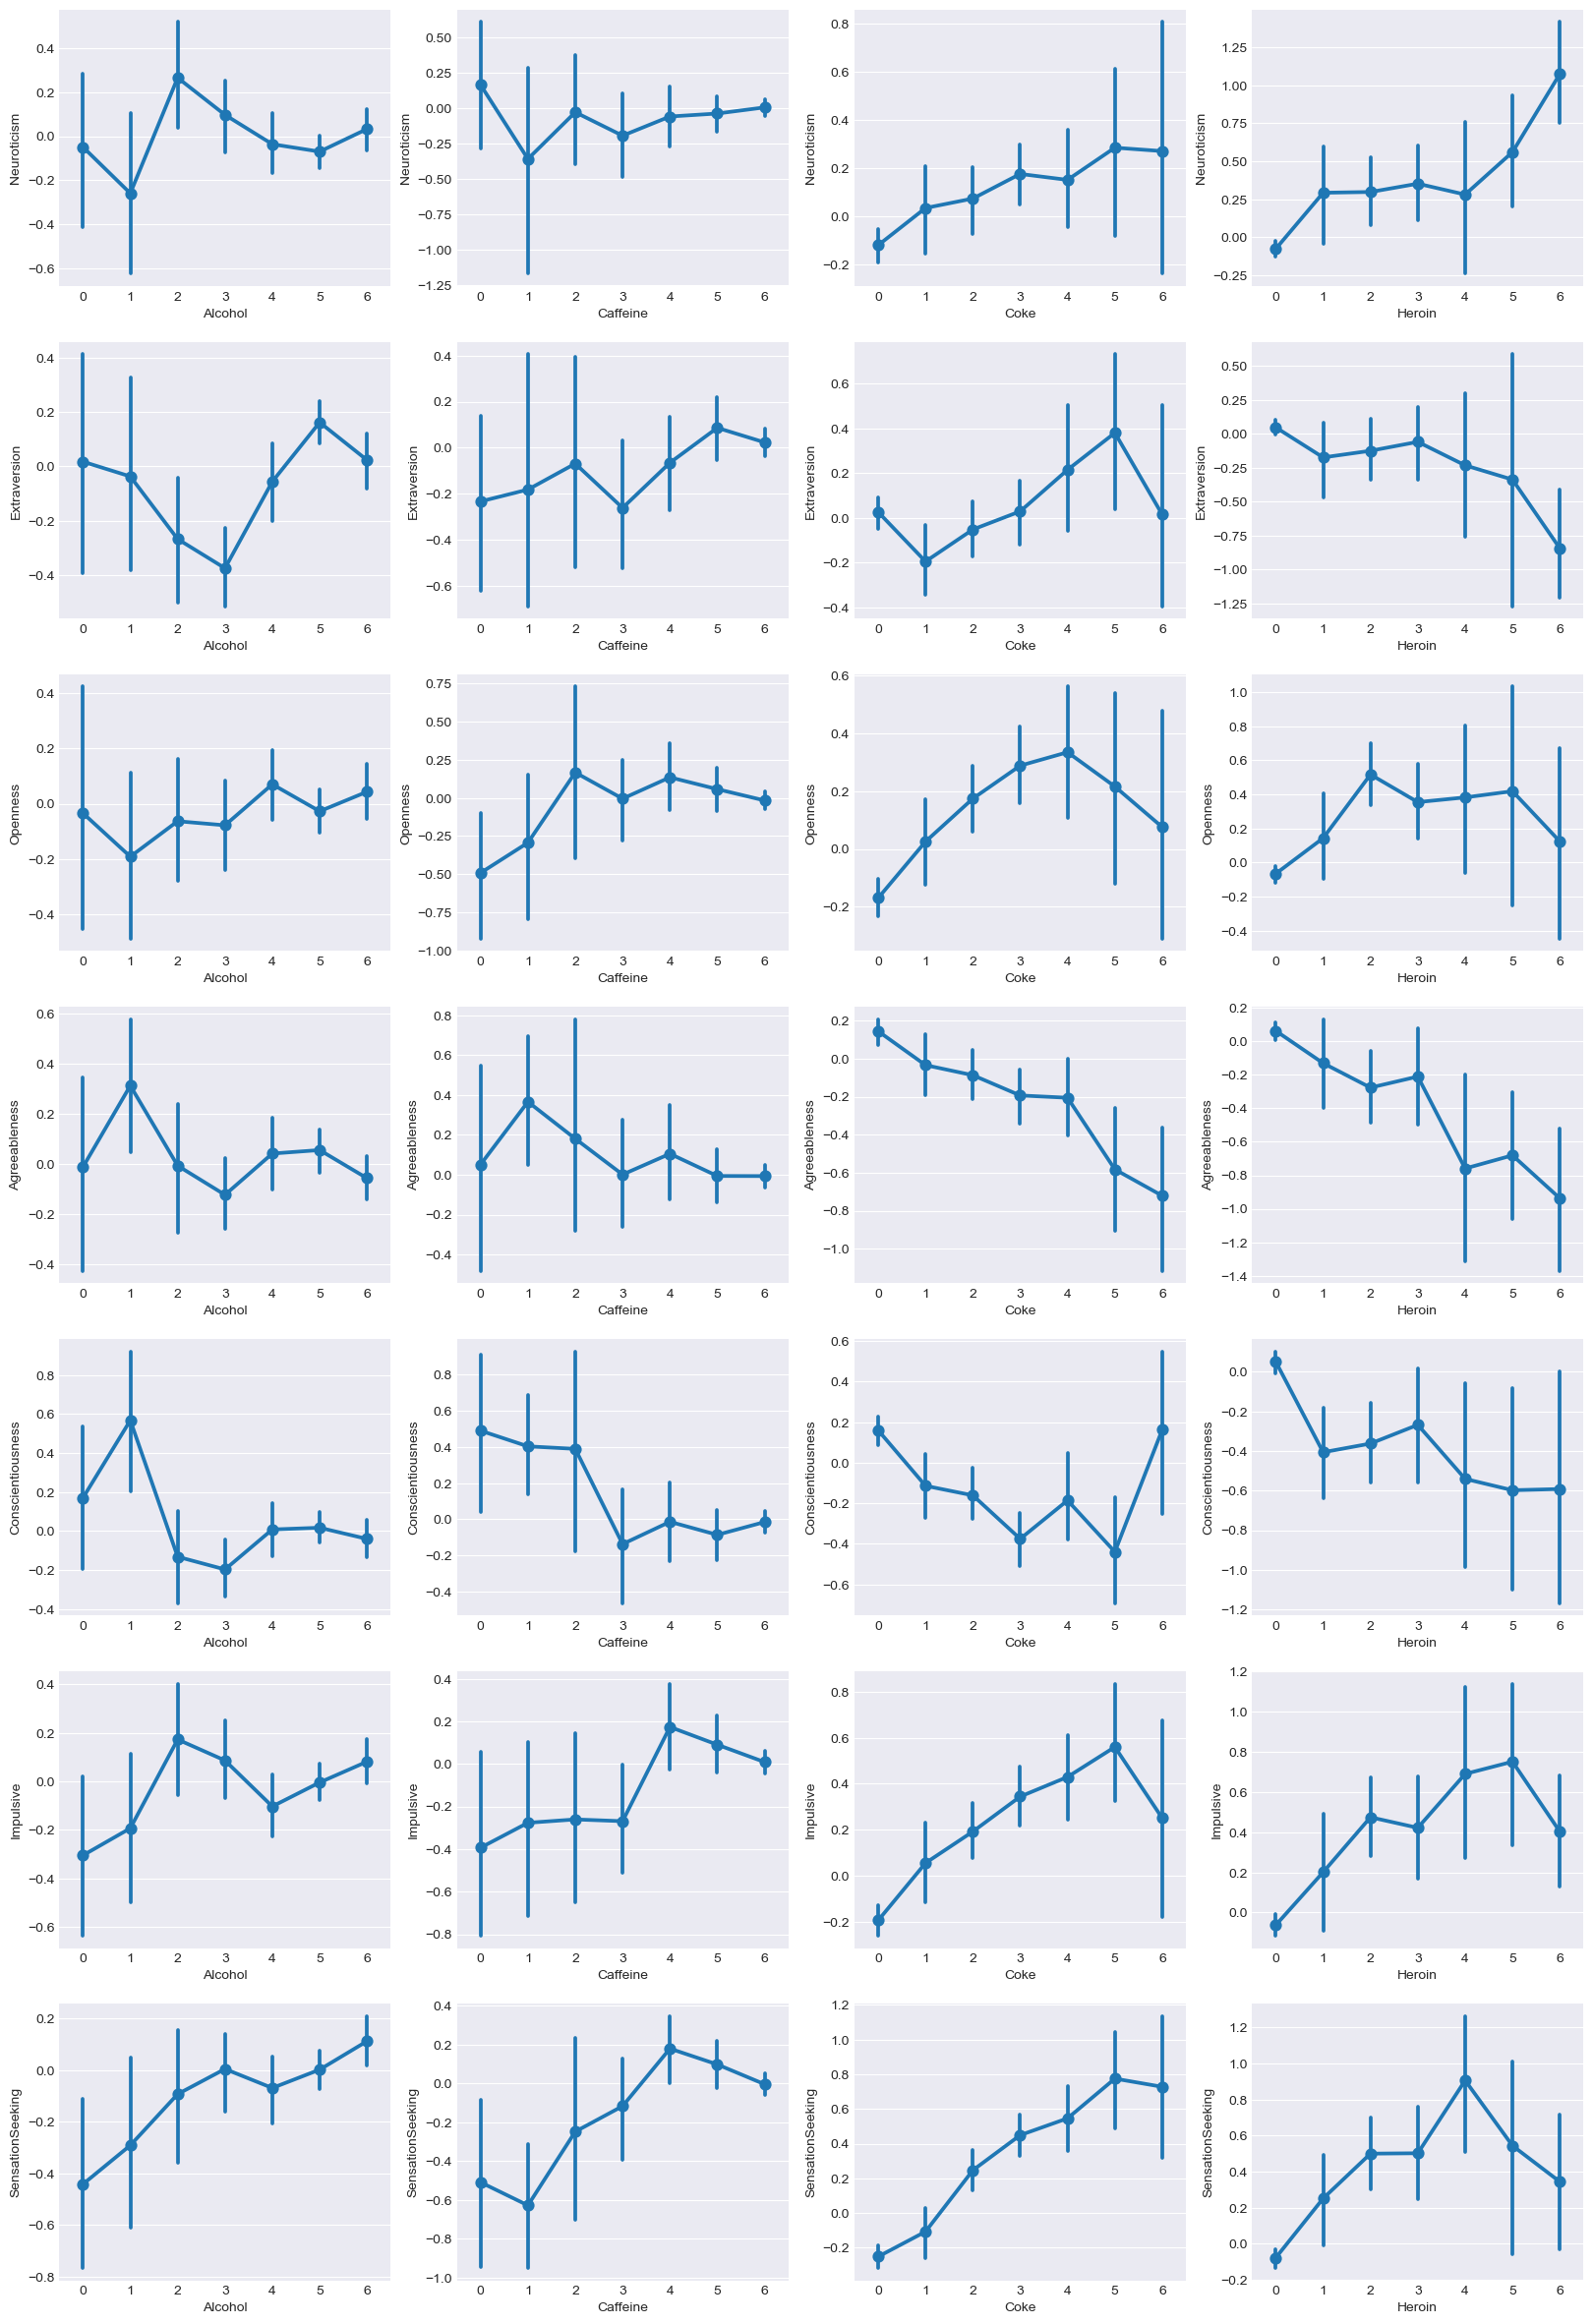

In [251]:
fig, axes = plt.subplots(7, 4, sharex=False, sharey=False, figsize=(20, 30))
for i, feature in enumerate(numericals):
    for j, target in enumerate(models_targets):
        sns.pointplot(x=target, y=feature, data=train_set, ax=axes[i][j])

Using scatter plots with targets on the y-axis and features on the x-axis does not really help us out as we cannot see any clear relationship. Tp try to get a different view we can try to usepointplots the other way around (targets on the x-axis and features on the y-axis). There are no clear relationships either are most strips overlap, this is to be expected as categories (of targets) with few observations have large variance.

While using our numerical features in a linear model (e.g. logistic regression) might not be the best idea, we can still try to use them in a non-linear model (e.g. decision tree) as they might be useful for splitting the data. Forward selection will help us decide if we should keep them or not.

Based on the above, I do not really see any way to improve our models by using feature engineering on these features.

The only potential linear relationship appearing is between `SensationSeeking` (and `Impulsive`) and `Coke`.

Given the nature of our categorical features, there is no real point in looking at relationships withing them or with numerical features. Most of them should not be linked (if they are it would likely be a coincidence or because of the way participants have been sampled), and some might be linked (ex age and education as younger people certainely do not have doctorate degrees) or `Ethnicity` and `Country` but that should not be a problem if we use forward selection with cross validation.

We can and we should look at their relationships with targets though.

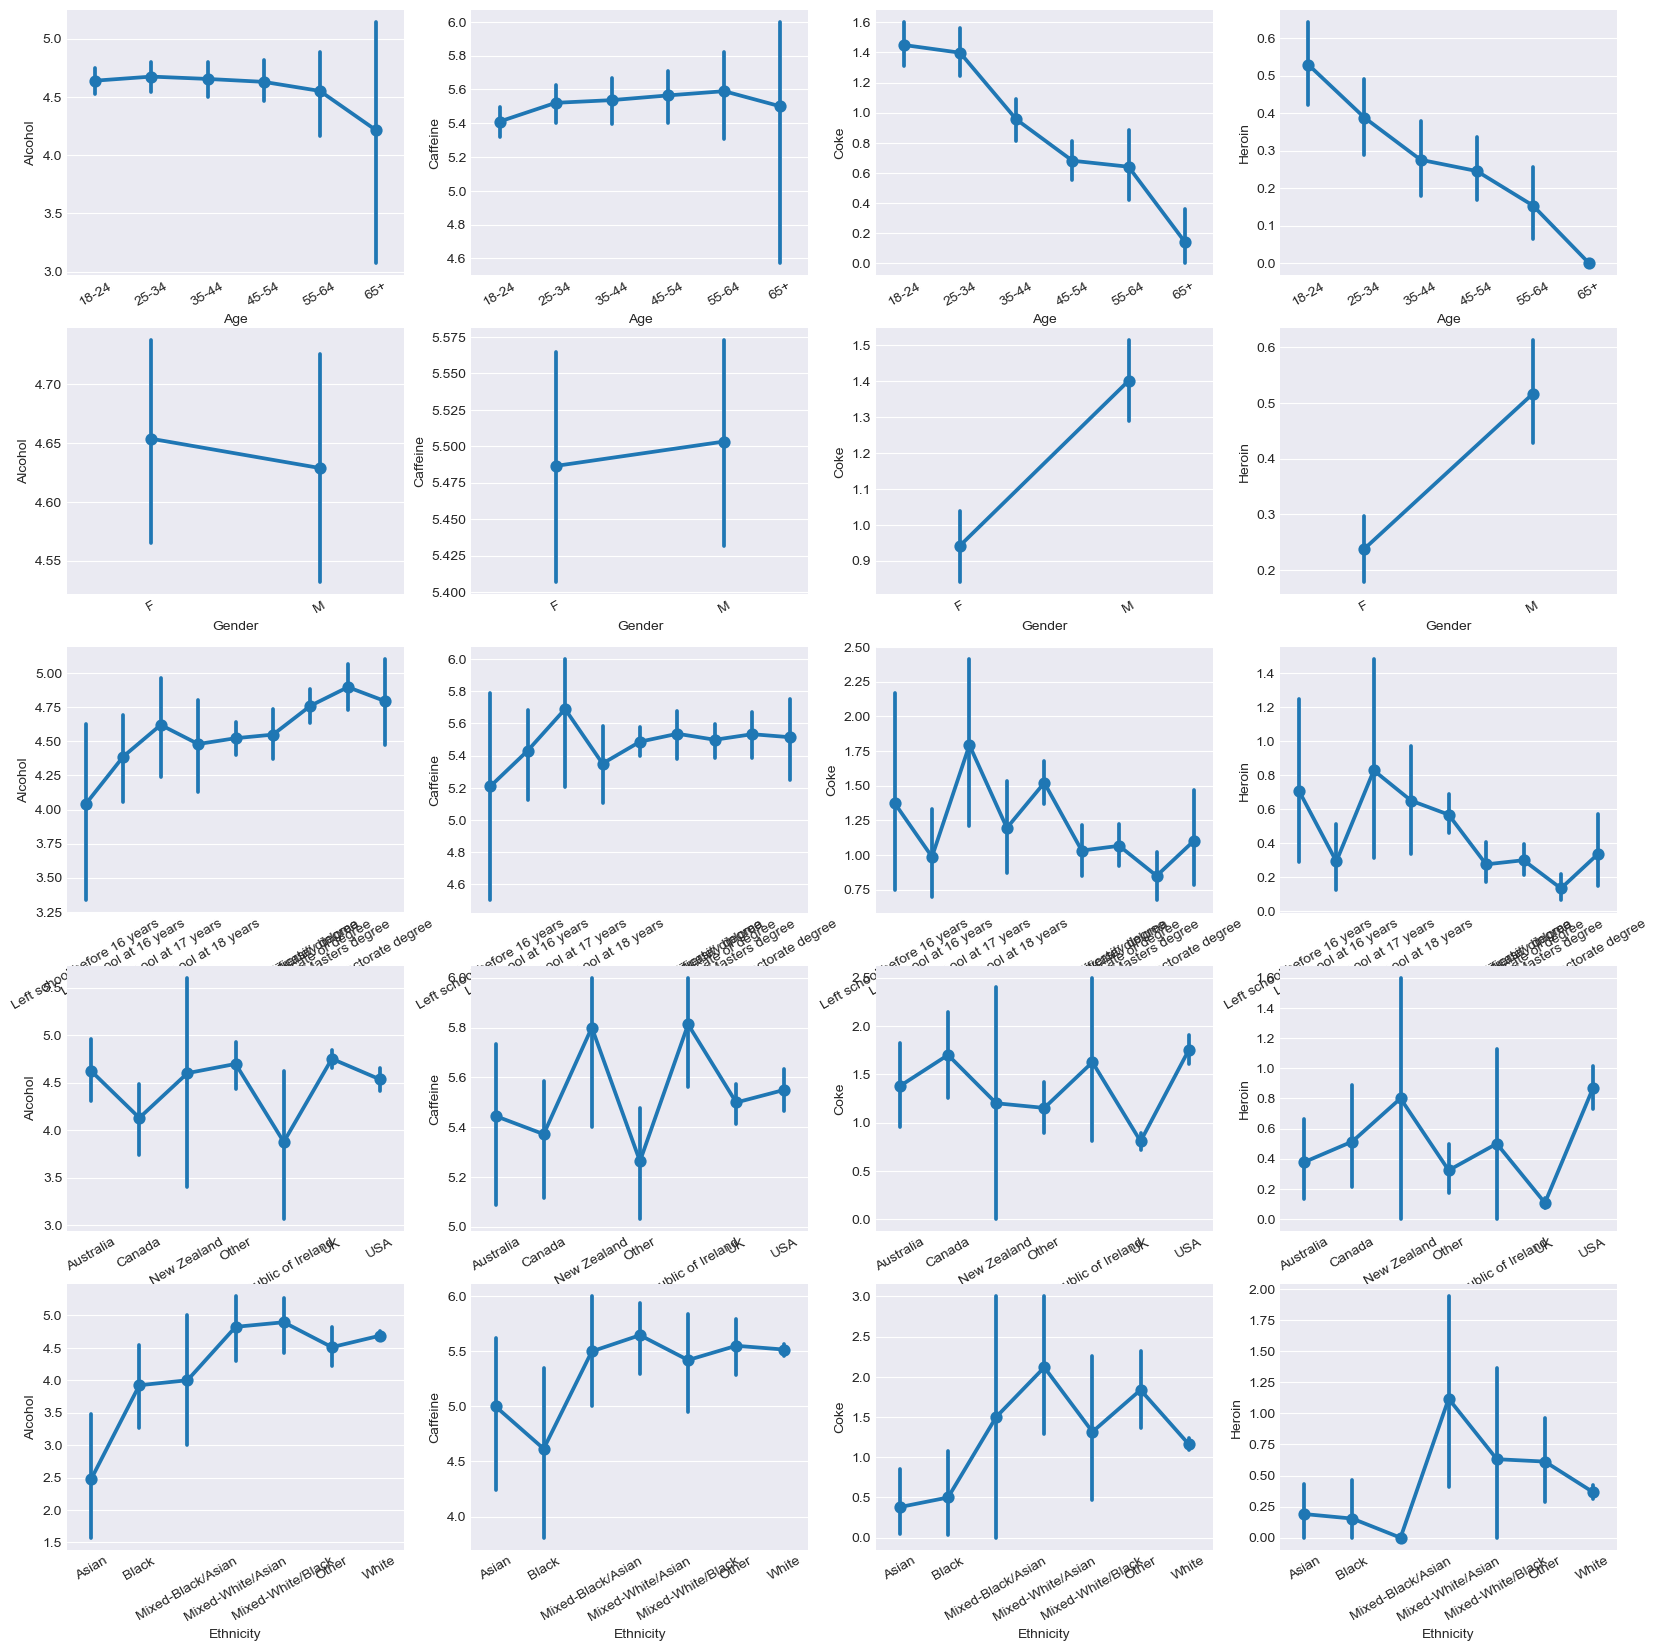

In [252]:
fig, axes = plt.subplots(5, 4, sharex=False, sharey=False, figsize=(20, 20))
for i, feature in enumerate(categoricals):
    for j, target in enumerate(models_targets):
        sns.pointplot(x=feature, y=target, data=train_set, ax=axes[i][j])
        axes[i][j].tick_params(axis='x', labelrotation=30)

`Genre` is definitely a good predictor for `Coke` and `Heroin` as mens definitely have a more recent consumption.

`Age` is also one for these two targets (there seems to be a linear relationship) but we might want to group 65+ with the previous category as there are few observations for this category. Also We could keep a numerical version (could be useful for KNN for example) and a dummies of 3 main categories (young, middle aged, older) for decision trees.

`Education` seems to have little or no relationships with the targets (maybe a "linear" one with `Alcohol` but it is not clear), we can try to keep it as numerical for KNN for alcohol and maybe a dummy (stopped at high school, or continued) for decision trees.

`Country` seems to have little or no relationships with the targets but this is because of the imbalance of classes. If we just look at `UK` and `USA`, we see a much higher "recentliness" of `Coke` and `Heroin` consumption for `USA` than `UK`. We will simply keep UK, USA and group all other countries together with `other`.

Due to its extreme imbalance, `Ethnicity` should maybe not be used, but since we will use forward selection with cross validation we can try to keep three dummies : `White`, `Black` and `Asian` as Asians and Blacks seem to have lower "recentliness" of consumption for different targets. In fact, if looking at a table of contribution to $\chi^2$ (independance test) below, we can see that the `Asian - Never used` has a very high contributions which indicated a relationship, this indicated that it could be a good predictor.

*Note on using $\chi^2$: We could use this approach to derive more features from our categorical features. However, given the very imbalanced nature of all of them, this could be dangerous as it could not generalize well on new data, especially if the minority classes all belong to similar classes of other features (e.g. all Asian sampled are just 18, hence a lot of them have never drunk alcohol, which might not be representative of Asian people in general.) In general, we should be cautious trying to derive or use at all classes with low counts as tehy may not be representative of the population and might show a relationship that does not exist. For this reason, we will limit ourselves to the above simple feature engineering ideas.*

In [253]:
def show_chi2_contributions(feature, target, data=train_set):
    observed = pd.crosstab(data[feature], data[target], margins=True)
    expected = observed.copy()
    for i in expected.index[:-1]:
        for j in expected.columns[:-1]:
            expected.loc[i,j] = expected.loc['All',j] * expected.loc[i,'All'] / expected.loc['All','All']  
    chi2_contribution = ((observed-expected)**2 / expected)
    # add totals
    chi2_contribution.loc['All'] = chi2_contribution.sum()
    chi2_contribution.loc[:,'All'] = chi2_contribution.sum(axis=1)
    # print chi2 p value
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    print(f"Chi2 p-value: {p}")
    return chi2_contribution

In [254]:
show_chi2_contributions('Ethnicity', 'Alcohol')

Chi2 p-value: 1.2451560060672353e-28


Alcohol,0,1,2,3,4,5,6,All
Ethnicity,,,,,,,,
Asian,189.987118,0.376244,0.752488,0.301530,0.427765,0.238466,5.713338,197.796949
Black,4.763299,0.612550,4.591909,2.708693,4.257969,0.193691,2.345983,19.474093
Mixed-Black/Asian,0.037160,0.035833,0.071666,3.007724,0.301261,0.049109,0.544127,4.046880
Mixed-White/Asian,0.315859,0.304579,0.609157,2.805164,2.560717,0.206603,0.030391,6.832469
Mixed-White/Black,0.353019,0.340411,0.680823,0.526194,1.211386,0.746883,0.005539,3.864256
Other,0.910418,0.877903,0.325345,1.641956,7.865021,1.095803,0.832366,13.548812
White,2.839049,0.079768,0.013060,0.177571,0.163529,0.024968,0.484758,3.782704
All,199.205922,2.627288,7.044448,11.168831,16.787648,2.555522,9.956503,249.346163


# Task 2: For a decision tree classifier and any other classifier of your choosing, use the data description provided [here](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) and the knowledge gained during EDA to find the best predictive model for the alcohol target, justifying the evaluation metric(s) you use.

## 2.1 Feature engineering

Before building a model, we will make the changes mentioned in the EDA section and encode our features as needed for fitting models. We will have more features than needed but forward selection will help us decide which one to keep. We will also scale the final set of features as it is generally preferable for different reasons. 

In [255]:
# encode category Gender as 0 and 1 in new feature called isMale
train_set["isMale"] = (train_set["Gender"] == 'M').astype(int)
# same on test set
test_set["isMale"] = (test_set["Gender"] == 'M').astype(int)

# for Age combine 55-64 and 65+ into 55+ category 
train_set["Age"] = train_set["Age"].replace(['55-64', '65+'], '55+')
# same on test set
test_set["Age"] = test_set["Age"].replace(['55-64', '65+'], '55+')

# encode category Age as 0, 1, 2, 3, 4 in new feature called AgeEncoded
train_set["AgeEncoded"] = train_set["Age"].cat.codes
# same on test set
test_set["AgeEncoded"] = test_set["Age"].cat.codes

# add young and middle age categories
train_set["isYoung"] = (train_set["Age"].isin(['18-24', '25-34'])).astype(int)
train_set["isMiddleAge"] = (train_set["Age"].isin(['35-44', '45-54'])).astype(int)
# same on test set
test_set["isYoung"] = (test_set["Age"].isin(['18-24', '25-34'])).astype(int)
test_set["isMiddleAge"] = (test_set["Age"].isin(['35-44', '45-54'])).astype(int)

# encode category Education as 0, 1, 2, 3, 4, 5, 6, 7, 8 in new feature called EducationEncoded
train_set["EducationEncoded"] = train_set["Education"].cat.codes
# same on test set
test_set["EducationEncoded"] = test_set["Education"].cat.codes

# add wentToCollege category
train_set["wentToCollege"] = (train_set["Education"].isin(['Some college or university, no certificate or degree', 'Professional certificate/ diploma', 'University degree', 'Masters degree', 'Doctorate degree'])).astype(int)
# same on test set
test_set["wentToCollege"] = (test_set["Education"].isin(['Some college or university, no certificate or degree', 'Professional certificate/ diploma', 'University degree', 'Masters degree', 'Doctorate degree'])).astype(int)

# is USA and is UK categories
train_set["isUSA"] = (train_set["Country"] == 'USA').astype(int)
train_set["isUK"] = (train_set["Country"] == 'UK').astype(int)
# same on test set
test_set["isUSA"] = (test_set["Country"] == 'USA').astype(int)
test_set["isUK"] = (test_set["Country"] == 'UK').astype(int)

# Ethnicity dummies (white, black, asian)
train_set["isWhite"] = (train_set.Ethnicity == 'White').astype(int)
train_set["isAsian"] = (train_set.Ethnicity == 'Asian').astype(int)
train_set["isBlack"] = (train_set.Ethnicity == 'Black').astype(int)
# same on test set
test_set["isWhite"] = (test_set.Ethnicity == 'White').astype(int)
test_set["isAsian"] = (test_set.Ethnicity == 'Asian').astype(int)
test_set["isBlack"] = (test_set.Ethnicity == 'Black').astype(int)

categoricals_encoded = ['isMale', 'AgeEncoded', 'isYoung', 'isMiddleAge', 'EducationEncoded', 'wentToCollege', 'isUSA', 'isUK', 'isWhite', 'isAsian', 'isBlack']
clf_features = numericals + categoricals_encoded

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit scaler on train set and transform both train and test sets
train_set[clf_features] = scaler.fit_transform(train_set[clf_features])
test_set[clf_features] = scaler.transform(test_set[clf_features])

train_set[clf_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Neuroticism        1507 non-null   float64
 1   Extraversion       1507 non-null   float64
 2   Openness           1507 non-null   float64
 3   Agreeableness      1507 non-null   float64
 4   Conscientiousness  1507 non-null   float64
 5   Impulsive          1507 non-null   float64
 6   SensationSeeking   1507 non-null   float64
 7   isMale             1507 non-null   float64
 8   AgeEncoded         1507 non-null   float64
 9   isYoung            1507 non-null   float64
 10  isMiddleAge        1507 non-null   float64
 11  EducationEncoded   1507 non-null   float64
 12  wentToCollege      1507 non-null   float64
 13  isUSA              1507 non-null   float64
 14  isUK               1507 non-null   float64
 15  isWhite            1507 non-null   float64
 16  isAsian            1507 

Perfect, all our features are now in the right format for classification.

## 2.2 Decision tree classifier

### 2.2.1 Forward feature selection with cross-validation

Let's first define a general forward selection function that we can use both for decision trees and KNN. This function takes as input a classifier, a set of features, a target, and a number of folds for cross validation. It uses the F1 macro score as a metric for evaluating models. It returns all the features added until the cross validation score does not improve anymore, along with the scores at each step of the process.

In [256]:
from sklearn.model_selection import cross_val_score

def forward_selection(features, target, model, cv=10): 
    remaining_features = list(features.columns)
    selected_features = []
    model_score = []
    last_max_score_feature = None
    last_max_score = None
    while last_max_score == None and len(remaining_features) > 0:
        #print(f"\n---{len(selected_features)} features selected for now---")
        for feature in remaining_features:
            X = features[selected_features + [feature]]
            cv_score = cross_val_score(model, X, target, cv=cv, scoring='f1_macro').mean()
            #print(f"Trying {feature} - CV score: {cv_score}")
            if last_max_score is None or cv_score > last_max_score:
                last_max_score = cv_score
                last_max_score_feature = feature
        if len(model_score) == 0 or last_max_score > model_score[-1]:
            #print(f"Adding {last_max_score_feature} with score {last_max_score}")
            selected_features.append(last_max_score_feature)
            remaining_features.remove(last_max_score_feature)
            model_score.append(last_max_score)
            last_max_score = None
            last_max_score_feature = None
            
    return selected_features, model_score

We also define a function to show the results of the forward selection.

In [257]:
def show_forward_selection_results(selected_features, model_score):
    # create a dataframe with selected features, their score and percentage increase from previous one
    df = pd.DataFrame({'feature':selected_features, 'score':model_score})
    # add column with percentage increase from previous score, put 0 for first feature
    df['pct_score_increase'] = df.score.pct_change().fillna(0)
    return df

We can now use our function to find the best features for predicting `Alcohol` consumption. For now we use the default parameters of the decision tree classifier, we will tune them later.

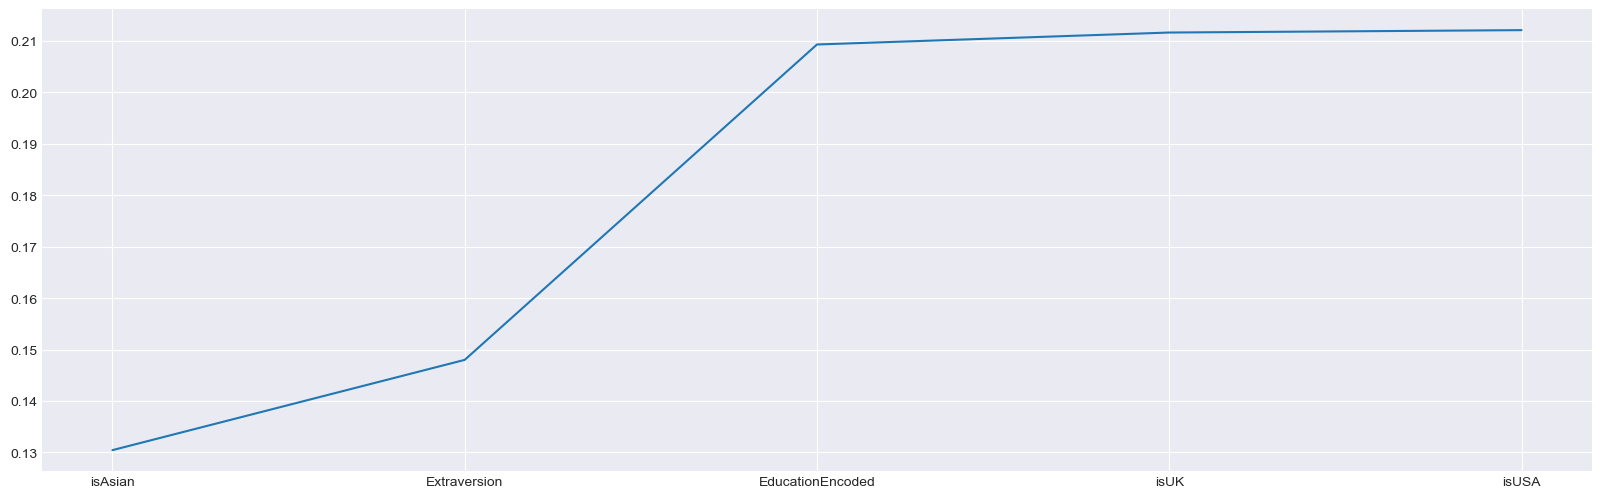

In [258]:
# create decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
selected_features, model_score = forward_selection(train_set[clf_features], train_set['Alcohol'], dt)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [259]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,isAsian,0.130454,0.000000
1,Extraversion,0.148006,0.134540
2,EducationEncoded,0.209325,0.414308
3,isUK,0.211650,0.011107
4,isUSA,0.212116,0.002201


This is definitely bad (F1 score is between 0 and 1) and here we have 0.2 at best. Forward selection keeps 2 features but the last two only provide minimal improvement so we can keep 3 features only.

Even if the score seems really bad, we will go through hyperparameter tunning, then fit a model with all the training data, evaluate it on the test set using several metrics and look at the confusion matrix. We will also compare to a model using all features.

In [260]:
decision_tree_kept_features = selected_features[:3]


### 2.2.2 Hyperparameter tuning (GridSearchCV)

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([('classifier', DecisionTreeClassifier(random_state=42))])
search_space = [{'classifier__criterion': ['gini', 'entropy', 'log_loss'], 'classifier__max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}]
clf = GridSearchCV(pipe, search_space, cv=5, verbose=1, scoring='f1_macro')
clf.fit(train_set[decision_tree_kept_features], train_set['Alcohol'])
clf.best_params_

Fitting 5 folds for each of 33 candidates, totalling 165 fits


{'classifier__criterion': 'gini', 'classifier__max_depth': 10}

In [262]:
# fit model on all train data with best params
final_dt = DecisionTreeClassifier(criterion=clf.best_params_['classifier__criterion'], max_depth=clf.best_params_['classifier__max_depth'], random_state=42)
final_dt.fit(train_set[decision_tree_kept_features], train_set['Alcohol'])

# predict on test set
dt_pred = final_dt.predict(test_set[decision_tree_kept_features])

### 2.2.3 Final model evaluation

In [263]:
from sklearn.metrics import f1_score, classification_report
print("F1 score:", f1_score(test_set['Alcohol'], dt_pred, average='macro'))
# print classification report
print(classification_report(test_set['Alcohol'], dt_pred))

F1 score: 0.1437259175099664
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        14
           3       0.24      0.12      0.16        41
           4       0.16      0.08      0.11        60
           5       0.41      0.67      0.51       154
           6       0.28      0.19      0.23        95

    accuracy                           0.35       377
   macro avg       0.16      0.15      0.14       377
weighted avg       0.29      0.35      0.30       377



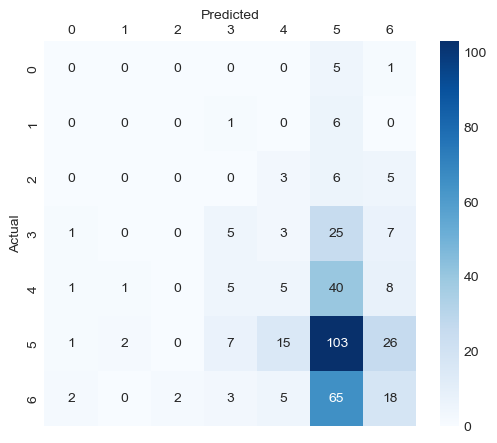

In [264]:
dt_cm = pd.crosstab(test_set['Alcohol'], dt_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

Well, our models does not do very well. It does a decent job at identifying the used in last week class (0.67 recall for this class) but still mixes it with other classes (0.41 precision for this class), i.e it predicts this class most of the time. For the other classes the results are worse. This illustrates the fact that what our classifier does, is mainly just predicting the majority class, which is not surprising with such an imbalanced target.

### 2.2.3 Trying to get better results

Our first result are quite terrible... We will try to improve our predictions using the 2 following strategies together :
- Grouping targets classes (e.g. recent user, past user, never) to reduce the imbalance of classes and make the job of the classifier easier as some classes are close in contextual meaning (someone who drunk alcohol during the week is not necessarily different from someone who drunk it in the last day).
- Using SMOTE (oversampling) to balance the target classes.

Note regarding grouping classes : the grouping will be different for each target as the dynamics of consumption are different for each drug.

In [265]:
# for target alcohol, derive new target grouped_alcohol with 3 levels (not_user : 0, occasional : 1, recent : 2) (0:[0,1], 1:[2,3,4], 2:[5,6])
train_set['groupedAlcohol'] = train_set['Alcohol'].map(lambda x: 0 if x in [0,1] else 1 if x in [2,3,4] else 2)
test_set['groupedAlcohol'] = test_set['Alcohol'].map(lambda x: 0 if x in [0,1] else 1 if x in [2,3,4] else 2)

In [266]:
from imblearn.over_sampling import SMOTE

print(train_set.groupedAlcohol.value_counts())

# use SMOTE to oversample groupedAlcohol target
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(train_set[clf_features], train_set['groupedAlcohol'])
y_train.value_counts()

2    1014
1     438
0      55
Name: groupedAlcohol, dtype: int64


2    1014
1    1014
0    1014
Name: groupedAlcohol, dtype: int64

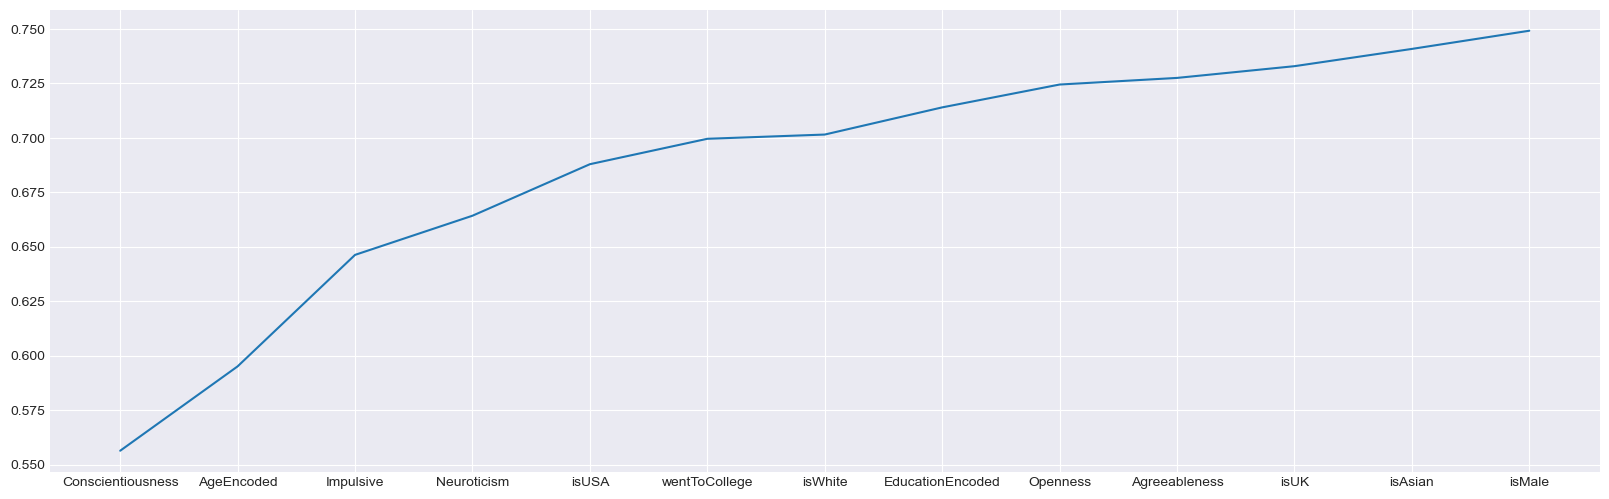

In [267]:
dt = DecisionTreeClassifier(random_state=42)
selected_features, model_score = forward_selection(X_train, y_train, dt)
#selected_features, model_score = forward_selection(train_set[clf_features], train_set['groupedAlcohol'], dt) # leads to 0.42 at most
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [268]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Conscientiousness,0.556344,0.000000
1,AgeEncoded,0.595066,0.069601
2,Impulsive,0.646237,0.085992
3,Neuroticism,0.664210,0.027813
4,isUSA,0.687858,0.035602
5,wentToCollege,0.699522,0.016957
6,isWhite,0.701467,0.002781
7,EducationEncoded,0.713935,0.017773
8,Openness,0.724425,0.014693
9,Agreeableness,0.727464,0.004195


I would only keep the first six features as we see a decline in improvement at the next step and then we have some redundant features. Given our imbalanced features before oversampling, chosing less features is probably safer to avoid overfitting and high variance.

In [269]:
grouped_alcohol_kept_features = selected_features[:6]

In [270]:
pipe = Pipeline([('classifier', DecisionTreeClassifier(random_state=42))])
search_space = [{'classifier__criterion': ['gini', 'entropy', 'log_loss'], 'classifier__max_depth': list(range(2, 15))}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[grouped_alcohol_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 39 candidates, totalling 390 fits
{'classifier__criterion': 'gini', 'classifier__max_depth': 13}
0.6837630576888551


Note that this time I limited the max depth parameter to 15 as otherwise it chooses None or a big number which is not good for generalization. (and the scores were only slightly better).

In [271]:
# fit model on all train data with best params
final_dt = DecisionTreeClassifier(criterion=clf.best_params_['classifier__criterion'], max_depth=clf.best_params_['classifier__max_depth'], random_state=42)
final_dt.fit(X_train[grouped_alcohol_kept_features], y_train)

# predict on test set
dt_pred = final_dt.predict(test_set[grouped_alcohol_kept_features])

In [272]:
print("F1 score:", f1_score(test_set['groupedAlcohol'], dt_pred, average='macro'))
# print classification report
print(classification_report(test_set['groupedAlcohol'], dt_pred))

F1 score: 0.3302074452969594
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.34      0.37      0.35       115
           2       0.66      0.62      0.64       249

    accuracy                           0.52       377
   macro avg       0.33      0.33      0.33       377
weighted avg       0.54      0.52      0.53       377



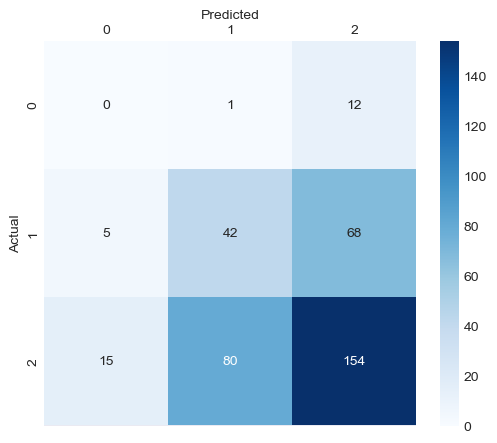

In [273]:
dt_cm = pd.crosstab(test_set['groupedAlcohol'], dt_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

After different trials, this seems to be the best I can do with a decision tree for predicting alcohol. Our results are better than before (F1 score increased to 0.33) on test set but are still quite bad. We could also try to group the target class into 2 categories (not user, user) instead, this would for sure make the job of the classifier easier, but the results would also be less interesting. 

If we look at the classification report we can see that for the majority class precision improved so this is positive, it means more of the times the classifier predicted this class, it was right. However we have 0 recall and precision for the minority class as our classifier never predicted it correctly. There may be two causes for this (combined) : the classifier still predicts the majority class most of the time despite using oversampling, the test set contains only a few observations of the minority class which does not give the classifier enough opportunities to predict it.

*Note on train test split : our split would ideally be stratified but for convenience (since we want to predict multiple targets) I made only one split at the beginning which is not.*

## 2.3 Other classifier (KNN)

### 2.3.1 Forward feature selection with cross-validation

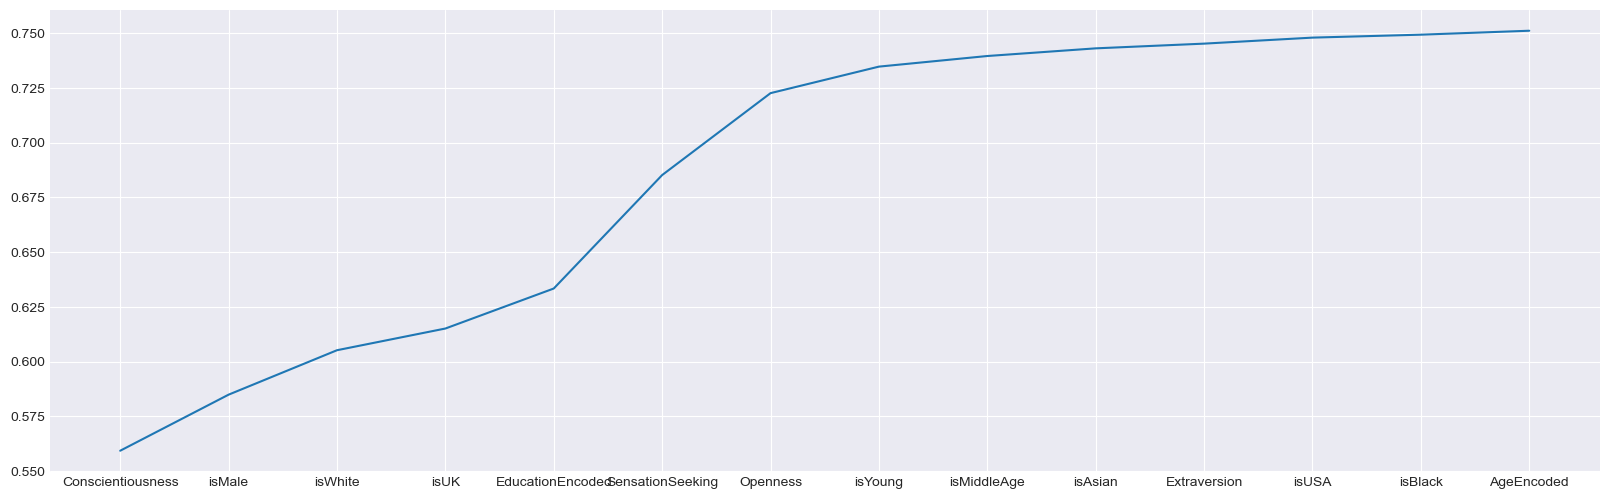

In [274]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
selected_features, model_score = forward_selection(X_train, y_train, knn)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [275]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Conscientiousness,0.559331,0.000000
1,isMale,0.584938,0.045781
2,isWhite,0.605233,0.034696
3,isUK,0.615146,0.016379
4,EducationEncoded,0.633420,0.029707
5,SensationSeeking,0.685234,0.081800
6,Openness,0.722650,0.054603
7,isYoung,0.734762,0.016760
8,isMiddleAge,0.739606,0.006593
9,isAsian,0.743106,0.004732


In [276]:
knn_kept_features = selected_features[:8]

### 2.3.2 Hyperparameter tuning (GridSearchCV)

In [277]:
pipe = Pipeline([('knn', KNeighborsClassifier())])
search_space = [{'knn__n_neighbors': range(3, 30), 'knn__metric': ['euclidean', 'manhattan', 'chebyshev']}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[knn_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
0.7699281664862434


### 2.3.3 Final model evaluation

In [278]:
# fit model on all train data with best params
final_knn = KNeighborsClassifier(n_neighbors=clf.best_params_['knn__n_neighbors'], metric=clf.best_params_['knn__metric'])
final_knn.fit(X_train[knn_kept_features], y_train)

# predict on test set
knn_pred = final_knn.predict(test_set[knn_kept_features])
print("F1 score:", f1_score(test_set['groupedAlcohol'], knn_pred, average='macro'))
# print classification report
print(classification_report(test_set['groupedAlcohol'], knn_pred))

F1 score: 0.3903247450348899
              precision    recall  f1-score   support

           0       0.10      0.31      0.15        13
           1       0.36      0.39      0.37       115
           2       0.71      0.60      0.65       249

    accuracy                           0.53       377
   macro avg       0.39      0.43      0.39       377
weighted avg       0.58      0.53      0.55       377



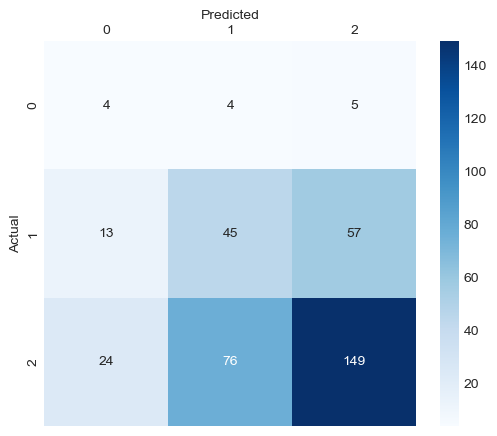

In [279]:
knn_cm = pd.crosstab(test_set['groupedAlcohol'], knn_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

The macro F1 score is a bit better (almost 0.4) but still not terrible. However this time, the minority class has been predicted correctly 4 times giving it a recall of of 0.3. However it should be noted that it predicted this class twice as much as the decision tree did so the precision is still very bad for it. This model seems to do a bit better overall than the decision tree but not we are still badly impacted by the imbalance of classes.

Still, it would be interesting to have more testing data (enough observations for the minority classes) to be able to judge the model better as we have much better scores on the oversampled training sets and the low number of test instances for the minority classes skews the evaluation.

*Also because of the very low number of observations for some classes, just changing the split random seed yields quite different results.*

Even if that is a little bit "cheating", we can try to evaluate the final model on the oversampled train set.

In [280]:
# predict on train set
knn_pred = final_knn.predict(X_train[knn_kept_features])
print("F1 score:", f1_score(y_train, knn_pred, average='macro'))
# print classification report
print(classification_report(y_train, knn_pred))

F1 score: 0.8847413094648074
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1014
           1       0.82      0.90      0.86      1014
           2       0.91      0.76      0.83      1014

    accuracy                           0.89      3042
   macro avg       0.89      0.89      0.88      3042
weighted avg       0.89      0.89      0.88      3042



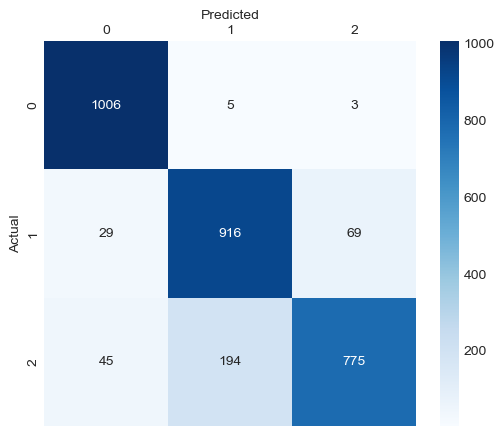

In [281]:
knn_cm = pd.crosstab(y_train, knn_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

In [282]:
cross_val_score(final_knn, X_train[knn_kept_features], y_train, cv=10, scoring='f1_macro').mean()

0.7699281664862434

Well, I do not want to get any conclusions out of this as it is not a good practice to evaluate a model on the same data it was trained on. However, it is interesting to see that on the train set, the classifier actually does a better job at identifying the minority class than the majority class. 

Also the model evaluated straight on the oversampled train set gives a huge 0.86 F1 which is surely overoptimistic but using cross val score gives a good 0.75 F1 score. This is still not good practice as we are not using completely separate data for training and testing but shows that there is certainely hope in finding a good model and that the test set results are maybe not representative of the model's performance.

Finally, the confusion matrix from the test on the train set shows that it is hard to separate the occasional users from the frequent users (high 1-2 and 2-1 counts) which indicates that a binary classification may be easier. (We could see that on test set but it confirms it.)

# Task 3: Use the same procedure as Task 2 to predict the following targets: caffeine, cocaine and heroin. Which "drug" (addictive substance) is the easiest to predict accurately, and why?

For this part, we will group our target classes as we did for alcohol (the groupings might differ for hard drugs though) and use the same procedure as before. We will fit both a decision tree and a KNN classifier for each target.

In [283]:
train_set['groupedCaffeine'] = train_set['Caffeine'].map(lambda x: 0 if x in [0,1] else 1 if x in [2,3,4] else 2)
test_set['groupedCaffeine'] = test_set['Caffeine'].map(lambda x: 0 if x in [0,1] else 1 if x in [2,3,4] else 2)
train_set['groupedCoke'] = train_set['Coke'].map(lambda x: 0 if x in [0] else 1 if x in [1,2,3] else 2)
test_set['groupedCoke'] = test_set['Coke'].map(lambda x: 0 if x in [0] else 1 if x in [1,2,3] else 2)
train_set['groupedHeroin'] = train_set['Heroin'].map(lambda x: 0 if x in [0] else 1 if x in [1,2,3] else 2)
test_set['groupedHeroin'] = test_set['Heroin'].map(lambda x: 0 if x in [0] else 1 if x in [1,2,3] else 2)

## 3.1 Caffeine

In [284]:
X_train, y_train = sm.fit_resample(train_set[clf_features], train_set['groupedCaffeine'])

### 3.1.1 Decision tree

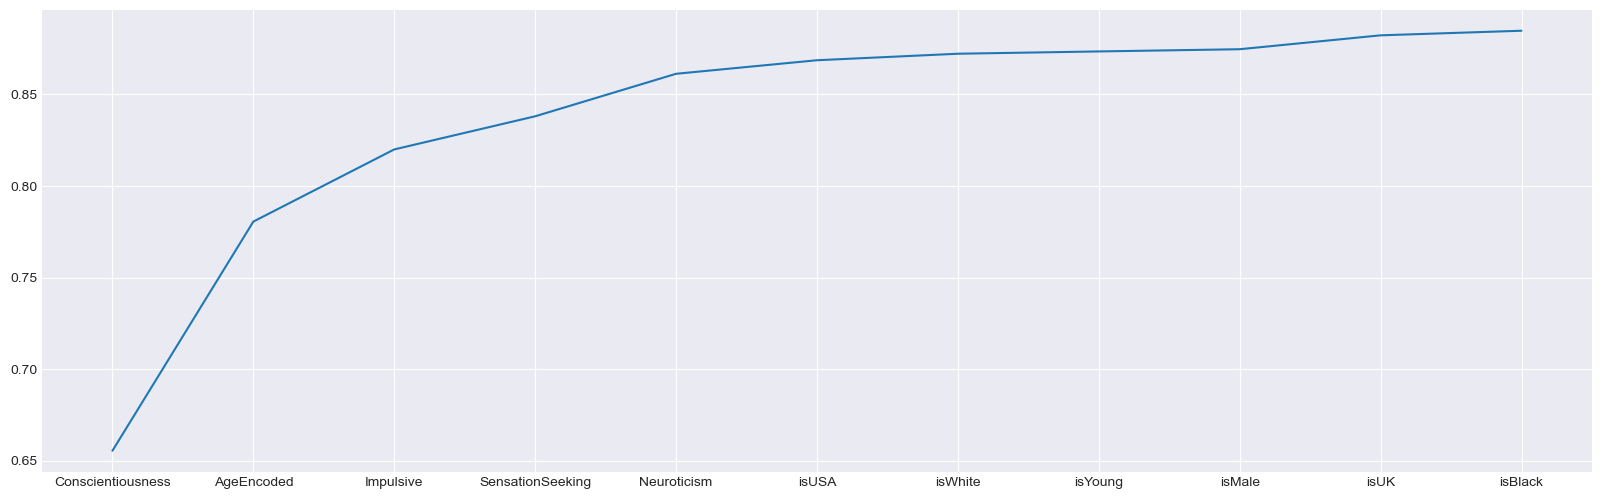

In [285]:
dt = DecisionTreeClassifier(random_state=42)
selected_features, model_score = forward_selection(X_train, y_train, dt)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [286]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Conscientiousness,0.655386,0.000000
1,AgeEncoded,0.780552,0.190981
2,Impulsive,0.819970,0.050500
3,SensationSeeking,0.838070,0.022074
4,Neuroticism,0.861288,0.027705
5,isUSA,0.868685,0.008588
6,isWhite,0.872239,0.004091
7,isYoung,0.873494,0.001439
8,isMale,0.874702,0.001383
9,isUK,0.882293,0.008678


In [287]:
dt_kept_features = selected_features[:5]

In [288]:
pipe = Pipeline([('classifier', DecisionTreeClassifier(random_state=42))])
search_space = [{'classifier__criterion': ['gini', 'entropy', 'log_loss'], 'classifier__max_depth': list(range(2, 15))}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[dt_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 39 candidates, totalling 390 fits
{'classifier__criterion': 'gini', 'classifier__max_depth': 14}
0.8391326987830577


In [289]:
# fit model on all train data with best params
final_dt = DecisionTreeClassifier(criterion=clf.best_params_['classifier__criterion'], max_depth=clf.best_params_['classifier__max_depth'], random_state=42)
final_dt.fit(X_train[dt_kept_features], y_train)

# predict on test set
dt_pred = final_dt.predict(test_set[dt_kept_features])
print("F1 score:", f1_score(test_set['groupedCaffeine'], dt_pred, average='macro'))
# print classification report
print(classification_report(test_set['groupedCaffeine'], dt_pred))

F1 score: 0.330703507200441
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.14      0.16      0.15        43
           2       0.87      0.82      0.84       325

    accuracy                           0.72       377
   macro avg       0.34      0.33      0.33       377
weighted avg       0.76      0.72      0.74       377



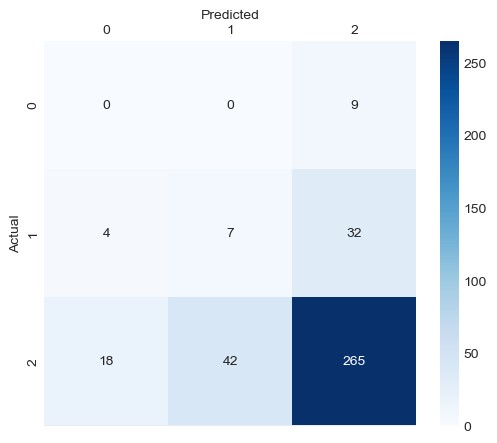

In [290]:
dt_cm = pd.crosstab(test_set['groupedCaffeine'], dt_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

In [291]:
cross_val_score(final_dt, X_train[dt_kept_features], y_train, cv=10, scoring='f1_macro').mean()

0.8391326987830577

### 3.1.2 KNN

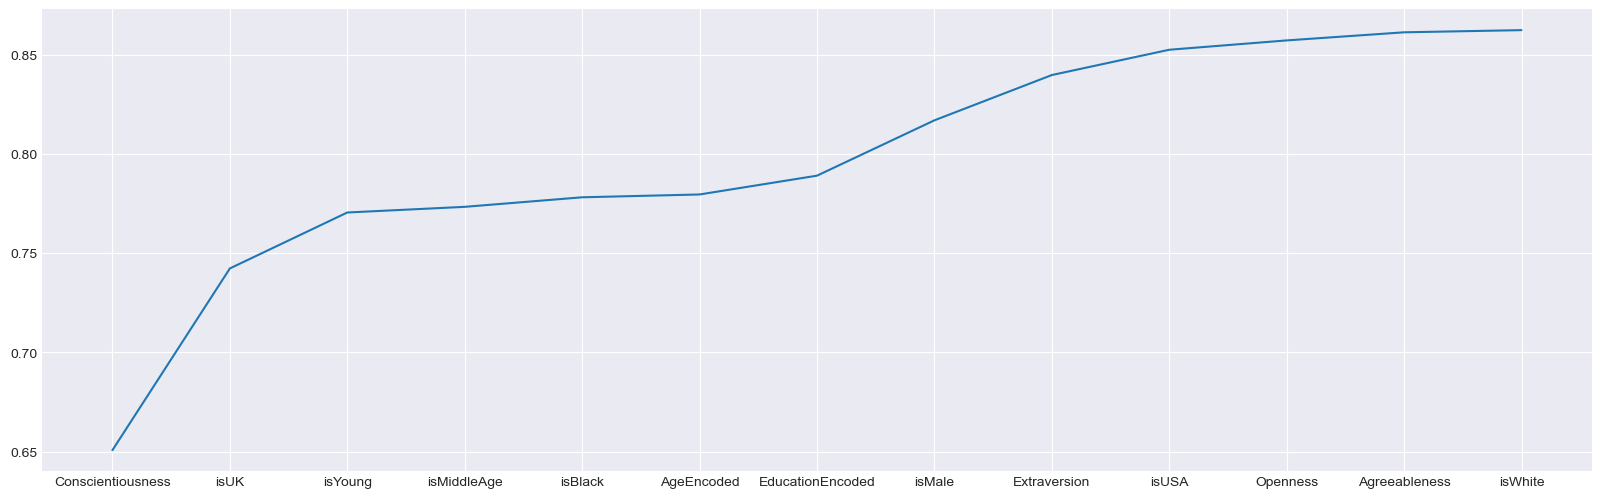

In [292]:
knn = KNeighborsClassifier()
selected_features, model_score = forward_selection(X_train, y_train, knn)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [293]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Conscientiousness,0.650804,0.000000
1,isUK,0.742288,0.140570
2,isYoung,0.770455,0.037947
3,isMiddleAge,0.773305,0.003699
4,isBlack,0.778111,0.006215
5,AgeEncoded,0.779535,0.001829
6,EducationEncoded,0.788997,0.012138
7,isMale,0.816862,0.035318
8,Extraversion,0.839667,0.027917
9,isUSA,0.852404,0.015169


In [294]:
knn_kept_features = selected_features[:10]

In [295]:
pipe = Pipeline([('knn', KNeighborsClassifier())])
search_space = [{'knn__n_neighbors': range(3, 30), 'knn__metric': ['euclidean', 'manhattan', 'chebyshev']}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[knn_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
0.8838661367960231


In [296]:
# fit model on all train data with best params
final_knn = KNeighborsClassifier(n_neighbors=clf.best_params_['knn__n_neighbors'], metric=clf.best_params_['knn__metric'])
final_knn.fit(X_train[knn_kept_features], y_train)

# predict on test set
knn_pred = final_knn.predict(test_set[knn_kept_features])
print("F1 score:", f1_score(test_set['groupedCaffeine'], knn_pred, average='macro'))
# print classification report
print(classification_report(test_set['groupedCaffeine'], knn_pred))

F1 score: 0.3710296098472667
              precision    recall  f1-score   support

           0       0.12      0.33      0.18         9
           1       0.12      0.21      0.15        43
           2       0.86      0.73      0.79       325

    accuracy                           0.66       377
   macro avg       0.36      0.42      0.37       377
weighted avg       0.75      0.66      0.70       377



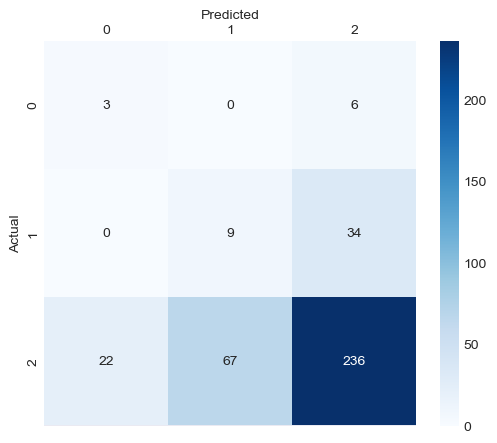

In [297]:
knn_cm = pd.crosstab(test_set['groupedCaffeine'], knn_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

In [298]:
cross_val_score(final_knn, X_train[knn_kept_features], y_train, cv=10, scoring='f1_macro').mean()

0.8838661367960231

## 3.2 Cocaine

In [299]:
X_train, y_train = sm.fit_resample(train_set[clf_features], train_set['groupedCoke'])

### 3.2.1 Decision tree

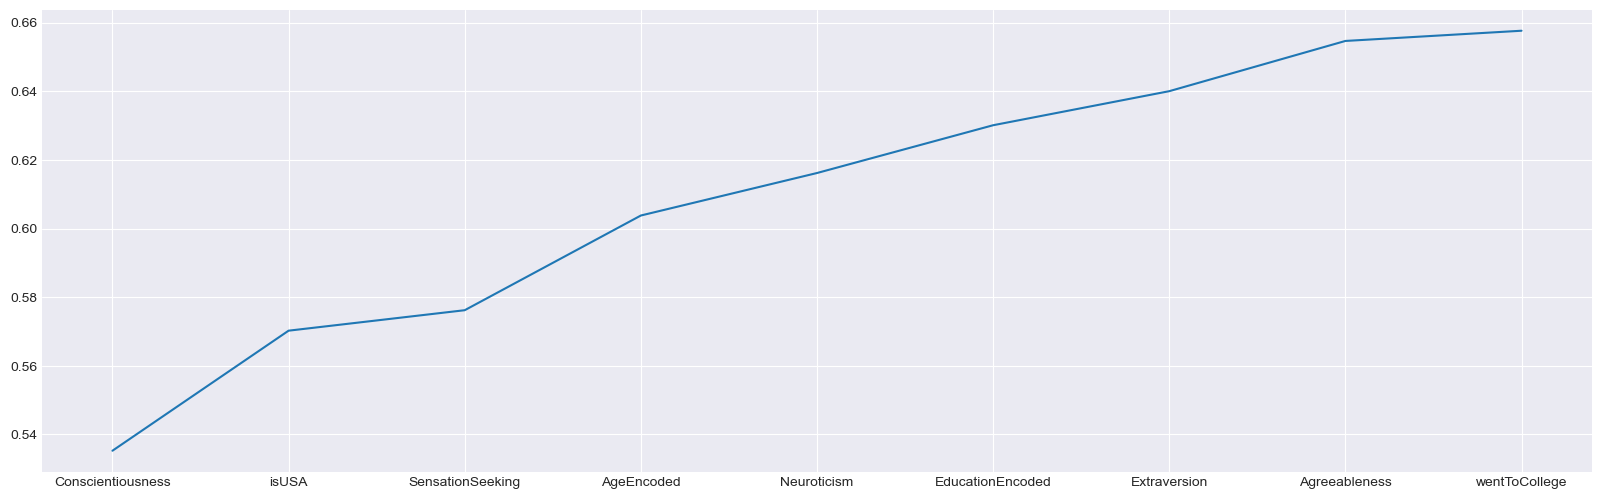

In [300]:
dt = DecisionTreeClassifier(random_state=42)
selected_features, model_score = forward_selection(X_train, y_train, dt)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [301]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Conscientiousness,0.535256,0.000000
1,isUSA,0.570247,0.065372
2,SensationSeeking,0.576212,0.010460
3,AgeEncoded,0.603811,0.047898
4,Neuroticism,0.616197,0.020513
5,EducationEncoded,0.630123,0.022601
6,Extraversion,0.640050,0.015753
7,Agreeableness,0.654689,0.022871
8,wentToCollege,0.657667,0.004549


In [302]:
dt_kept_features = selected_features[:8]

In [303]:
pipe = Pipeline([('classifier', DecisionTreeClassifier(random_state=42))])
search_space = [{'classifier__criterion': ['gini', 'entropy', 'log_loss'], 'classifier__max_depth': list(range(2, 15))}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[dt_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 39 candidates, totalling 390 fits
{'classifier__criterion': 'gini', 'classifier__max_depth': 14}
0.6531311987891056


In [304]:
# fit model on all train data with best params
final_dt = DecisionTreeClassifier(criterion=clf.best_params_['classifier__criterion'], max_depth=clf.best_params_['classifier__max_depth'], random_state=42)
final_dt.fit(X_train[dt_kept_features], y_train)

# predict on test set
dt_pred = final_dt.predict(test_set[dt_kept_features])
print("F1 score:", f1_score(test_set['groupedCoke'], dt_pred, average='macro'))
# print classification report
print(classification_report(test_set['groupedCoke'], dt_pred))

F1 score: 0.4081513592080889
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       213
           1       0.46      0.53      0.49       133
           2       0.13      0.13      0.13        31

    accuracy                           0.52       377
   macro avg       0.41      0.41      0.41       377
weighted avg       0.53      0.52      0.53       377



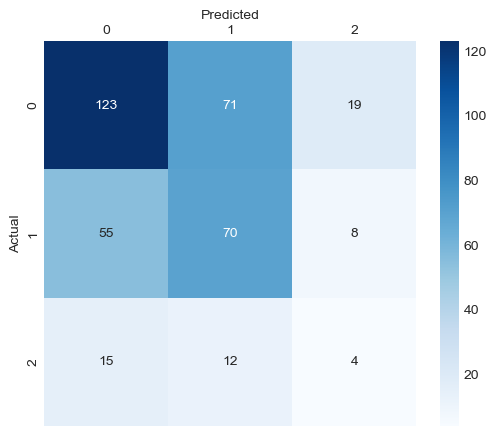

In [305]:
dt_cm = pd.crosstab(test_set['groupedCoke'], dt_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

In [306]:
cross_val_score(final_dt, X_train[dt_kept_features], y_train, cv=10, scoring='f1_macro').mean()

0.6531311987891056

### 3.2.2 KNN

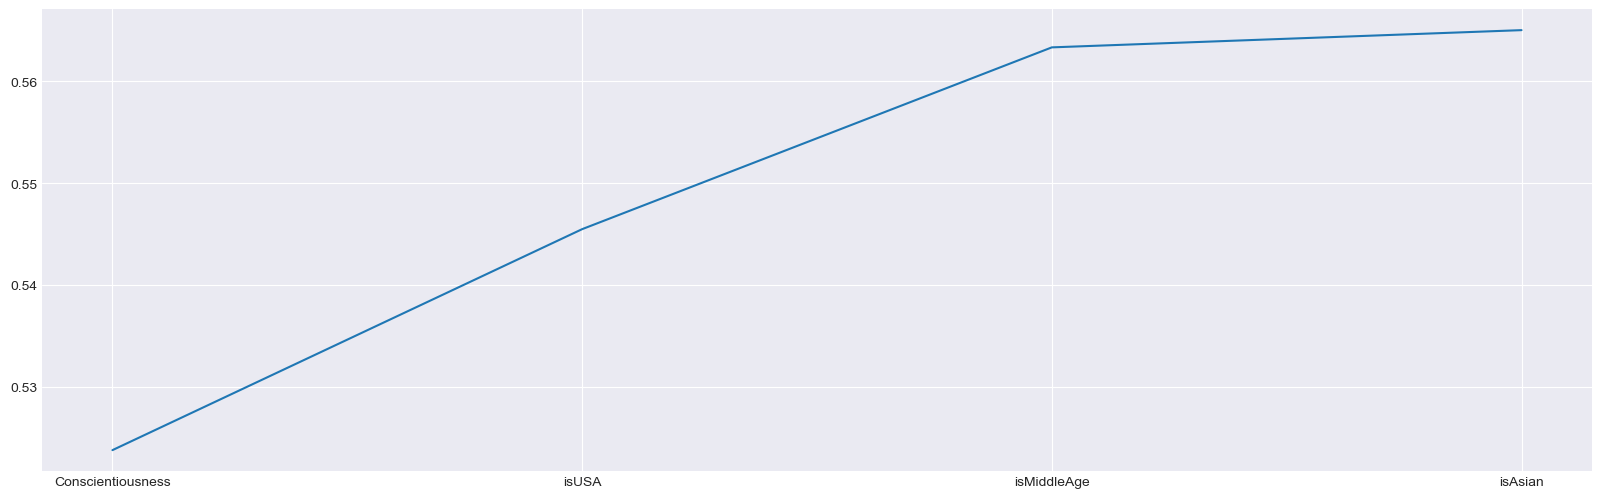

In [307]:
knn = KNeighborsClassifier()
selected_features, model_score = forward_selection(X_train, y_train, knn)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [308]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Conscientiousness,0.523760,0.000000
1,isUSA,0.545480,0.041471
2,isMiddleAge,0.563349,0.032757
3,isAsian,0.565043,0.003007


In [309]:
knn_kept_features = selected_features

In [310]:
pipe = Pipeline([('knn', KNeighborsClassifier())])
search_space = [{'knn__n_neighbors': range(3, 30), 'knn__metric': ['euclidean', 'manhattan', 'chebyshev']}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[knn_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'knn__metric': 'euclidean', 'knn__n_neighbors': 5}
0.5650426325636604


In [311]:
# fit model on all train data with best params
final_knn = KNeighborsClassifier(n_neighbors=clf.best_params_['knn__n_neighbors'], metric=clf.best_params_['knn__metric'])
final_knn.fit(X_train[knn_kept_features], y_train)

# predict on test set
knn_pred = final_knn.predict(test_set[knn_kept_features])
print("F1 score:", f1_score(test_set['groupedCoke'], knn_pred, average='macro'))
# print classification report
print(classification_report(test_set['groupedCoke'], knn_pred))

F1 score: 0.3761065323565323
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       213
           1       0.44      0.47      0.45       133
           2       0.00      0.00      0.00        31

    accuracy                           0.56       377
   macro avg       0.36      0.39      0.38       377
weighted avg       0.52      0.56      0.54       377



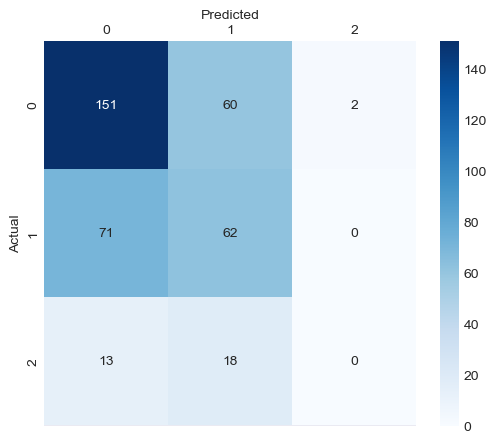

In [312]:
knn_cm = pd.crosstab(test_set['groupedCoke'], knn_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

In [313]:
cross_val_score(final_knn, X_train[knn_kept_features], y_train, cv=10, scoring='f1_macro').mean()

0.5650426325636604

## 3.3 Heroin

In [314]:
X_train, y_train = sm.fit_resample(train_set[clf_features], train_set['groupedHeroin'])

### 3.3.1 Decision tree

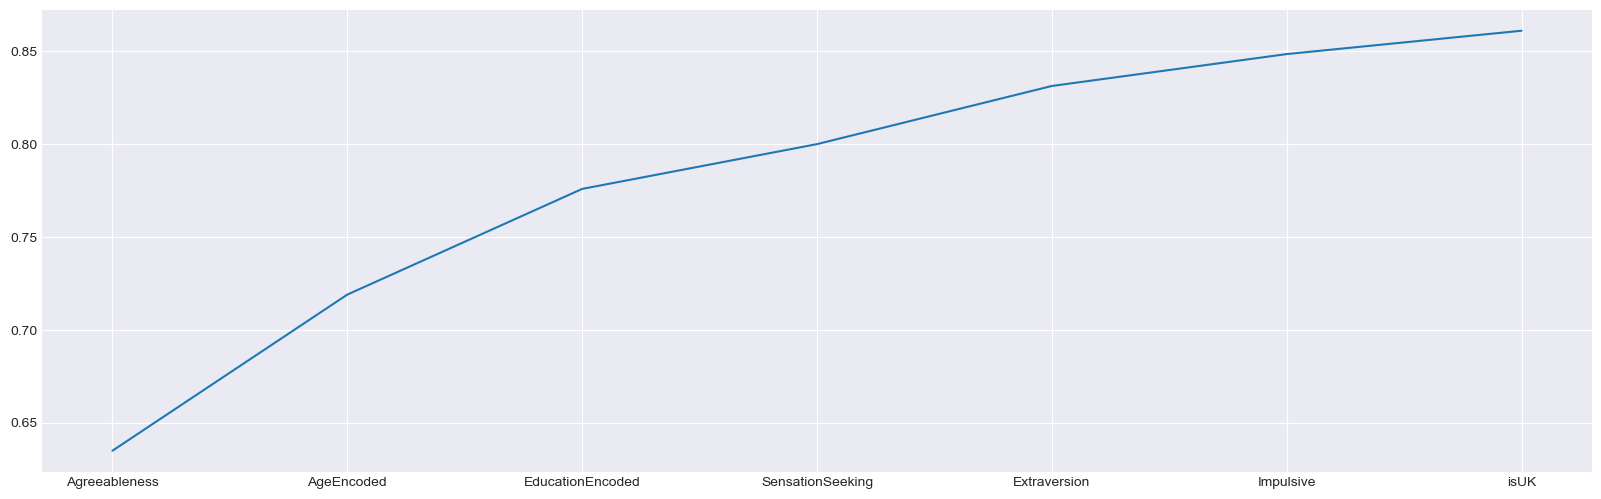

In [315]:
dt = DecisionTreeClassifier(random_state=42)
selected_features, model_score = forward_selection(X_train, y_train, dt)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [316]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Agreeableness,0.634921,0.000000
1,AgeEncoded,0.718956,0.132354
2,EducationEncoded,0.775844,0.079127
3,SensationSeeking,0.799951,0.031071
4,Extraversion,0.831254,0.039131
5,Impulsive,0.848421,0.020652
6,isUK,0.860988,0.014812


In [317]:
dt_kept_features = selected_features

In [318]:
pipe = Pipeline([('classifier', DecisionTreeClassifier(random_state=42))])
search_space = [{'classifier__criterion': ['gini', 'entropy', 'log_loss'], 'classifier__max_depth': list(range(2, 15))}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[dt_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 39 candidates, totalling 390 fits
{'classifier__criterion': 'gini', 'classifier__max_depth': 13}
0.8509117444740901


In [319]:
# fit model on all train data with best params
final_dt = DecisionTreeClassifier(criterion=clf.best_params_['classifier__criterion'], max_depth=clf.best_params_['classifier__max_depth'], random_state=42)
final_dt.fit(X_train[dt_kept_features], y_train)

# predict on test set
dt_pred = final_dt.predict(test_set[dt_kept_features])
print("F1 score:", f1_score(test_set['groupedHeroin'], dt_pred, average='macro'))
# print classification report
print(classification_report(test_set['groupedHeroin'], dt_pred))

F1 score: 0.36030646683408246
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       321
           1       0.22      0.26      0.24        47
           2       0.00      0.00      0.00         9

    accuracy                           0.72       377
   macro avg       0.37      0.36      0.36       377
weighted avg       0.77      0.72      0.75       377



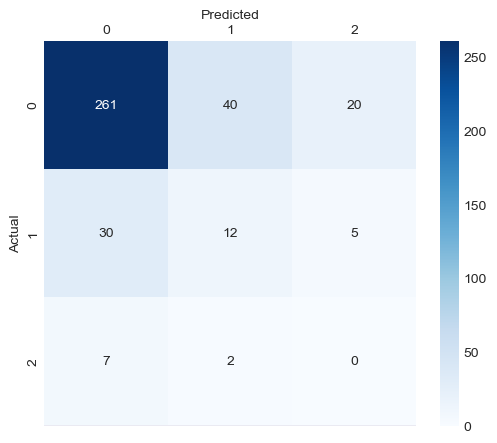

In [320]:
dt_cm = pd.crosstab(test_set['groupedHeroin'], dt_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

In [321]:
cross_val_score(final_dt, X_train[dt_kept_features], y_train, cv=10, scoring='f1_macro').mean()

0.8509117444740901

### 3.3.2 KNN

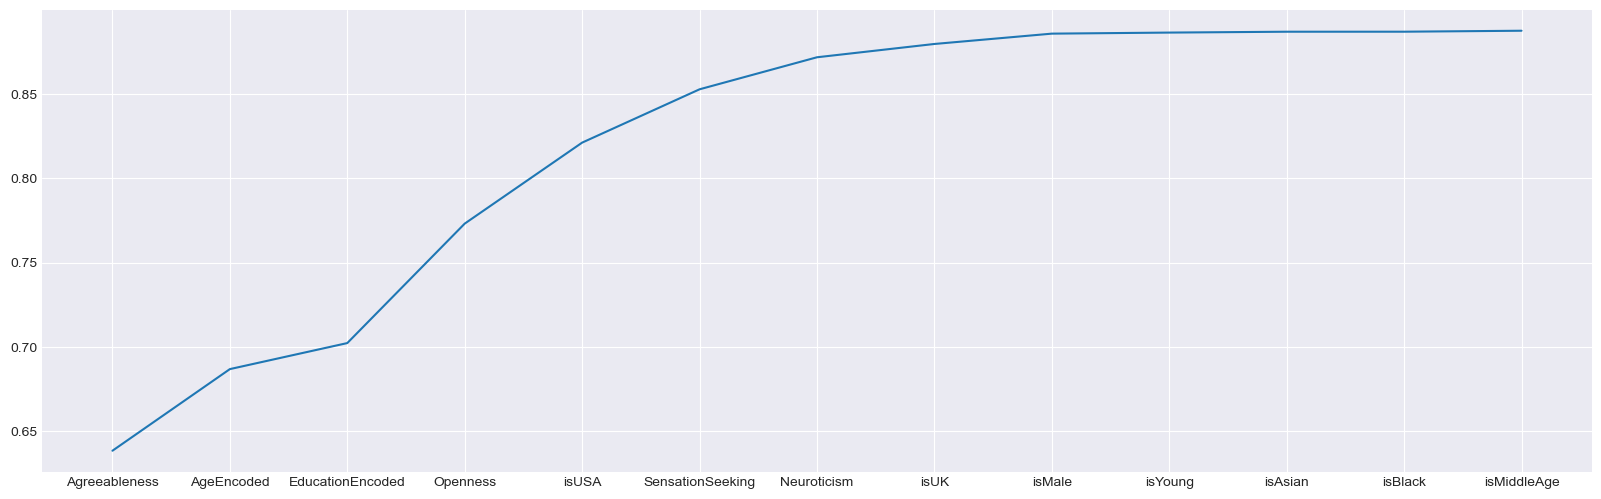

In [322]:
knn = KNeighborsClassifier()
selected_features, model_score = forward_selection(X_train, y_train, knn)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [323]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Agreeableness,0.638508,0.000000
1,AgeEncoded,0.686867,0.075737
2,EducationEncoded,0.702290,0.022455
3,Openness,0.773062,0.100773
4,isUSA,0.821048,0.062073
5,SensationSeeking,0.852637,0.038474
6,Neuroticism,0.871613,0.022255
7,isUK,0.879492,0.009040
8,isMale,0.885614,0.006960
9,isYoung,0.886241,0.000708


In [324]:
knn_kept_features = selected_features[:9]

In [325]:
pipe = Pipeline([('knn', KNeighborsClassifier())])
search_space = [{'knn__n_neighbors': range(3, 30), 'knn__metric': ['euclidean', 'manhattan', 'chebyshev']}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[knn_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'knn__metric': 'manhattan', 'knn__n_neighbors': 4}
0.9163165513387446


In [326]:
# fit model on all train data with best params
final_knn = KNeighborsClassifier(n_neighbors=clf.best_params_['knn__n_neighbors'], metric=clf.best_params_['knn__metric'])
final_knn.fit(X_train[knn_kept_features], y_train)

# predict on test set
knn_pred = final_knn.predict(test_set[knn_kept_features])
print("F1 score:", f1_score(test_set['groupedHeroin'], knn_pred, average='macro'))
# print classification report
print(classification_report(test_set['groupedHeroin'], knn_pred))

F1 score: 0.4049174006070558
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       321
           1       0.26      0.36      0.30        47
           2       0.04      0.11      0.06         9

    accuracy                           0.73       377
   macro avg       0.40      0.43      0.40       377
weighted avg       0.80      0.73      0.76       377



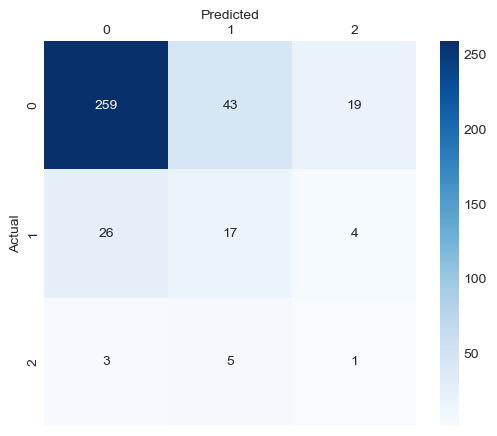

In [327]:
knn_cm = pd.crosstab(test_set['groupedHeroin'], knn_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

In [328]:
cross_val_score(final_knn, X_train[knn_kept_features], y_train, cv=10, scoring='f1_macro').mean()

0.9163165513387446

## 3.4 Easiest drug to predict

In all cases above, there the majority class is kind of difficult to separate to the "next one", it shows that a binary classification might be easier. Also we still have the problem of testing the minority class with very few observations on the test set, however using cross validation on the train set (although being a bad practice) gives a better idea of the model's performance.

The "best model" of all seems to be KNN on Heroin target. We will try to use binary classification (as suggested in the data description) with this model and target, even if that is less interesting in my opinion.

In [329]:
train_set['binaryHeroin'] = train_set['Heroin'].map(lambda x: 0 if x in [0, 1] else 1)
test_set['binaryHeroin'] = test_set['Heroin'].map(lambda x: 0 if x in [0, 1] else 1)

In [330]:
X_train, y_train = sm.fit_resample(train_set[clf_features], train_set['binaryHeroin'])

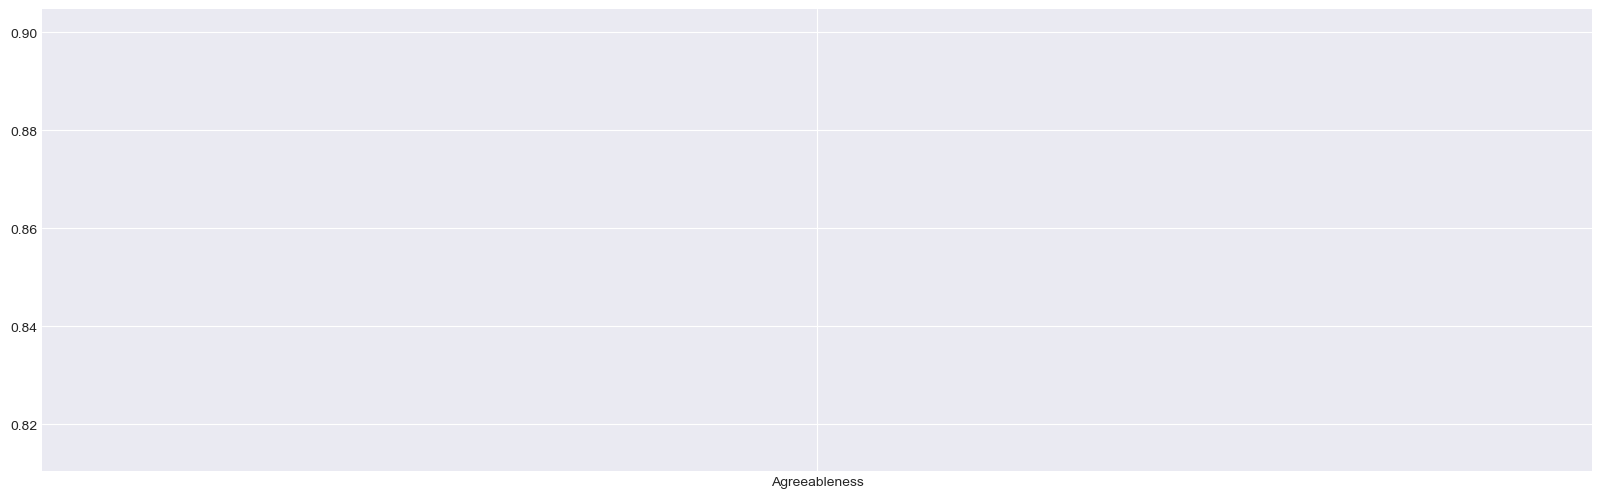

In [331]:
knn = KNeighborsClassifier()
selected_features, model_score = forward_selection(X_train, y_train, knn)
fig = plt.figure(figsize=(20, 6))
plt.plot(selected_features, model_score)

In [332]:
show_forward_selection_results(selected_features, model_score)

,feature,score,pct_score_increase
0,Agreeableness,0.85759,0.0


In [333]:
knn_kept_features = selected_features

In [334]:
pipe = Pipeline([('knn', KNeighborsClassifier())])
search_space = [{'knn__n_neighbors': range(3, 30), 'knn__metric': ['euclidean', 'manhattan', 'chebyshev']}]
clf = GridSearchCV(pipe, search_space, cv=10, verbose=1, scoring='f1_macro')
clf.fit(X_train[knn_kept_features], y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
{'knn__metric': 'euclidean', 'knn__n_neighbors': 3}
0.8609885943699744


In [335]:
# fit model on all train data with best params
final_knn = KNeighborsClassifier(n_neighbors=clf.best_params_['knn__n_neighbors'], metric=clf.best_params_['knn__metric'])
final_knn.fit(X_train[knn_kept_features], y_train)

# predict on test set
knn_pred = final_knn.predict(test_set[knn_kept_features])
print("F1 score:", f1_score(test_set['binaryHeroin'], knn_pred, average='macro'))
# print classification report
print(classification_report(test_set['binaryHeroin'], knn_pred))

F1 score: 0.571590909090909
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       338
           1       0.45      0.13      0.20        39

    accuracy                           0.89       377
   macro avg       0.68      0.56      0.57       377
weighted avg       0.86      0.89      0.87       377



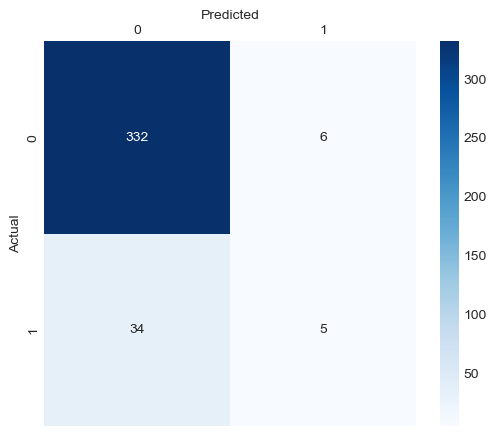

In [336]:
knn_cm = pd.crosstab(test_set['binaryHeroin'], knn_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(6,5))
g = sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.xaxis.set_label_position('top')

In [337]:
cross_val_score(final_knn, X_train[knn_kept_features], y_train, cv=10, scoring='f1_macro').mean()

0.8609885943699744

Well forward selection suggest to only use one feature and the F1 cross validation score on train set is worse, so maybe not better as it is but worth exploring.

# Task 4: Use hierarchical clustering to look for structural relationships within and between the features provided in the data. Hence, or otherwise, apply partitional clustering to the same data, discussing what groups of users have taken part in the drug consumption study.

For this part, I will use the same set of features `clf_features` as in the previous tasks. I wilkl do everything on the training set. I will use the `gower` distance as it is suitable for mixed data types.

We can start by computing the distance matrix.

In [338]:
import gower
dist_matrix = gower.gower_matrix(train_set[clf_features])

## 4.1 Hierarchical clustering

In [339]:
# hierarchical clustering using sklearn and gower distance
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, metric='precomputed', linkage='complete')
agg.fit(dist_matrix)
train_set['cluster'] = agg.labels_

# show cluster sizes
train_set.cluster.value_counts()

0    911
2    438
1    158
Name: cluster, dtype: int64

<AxesSubplot: xlabel='Cluster', ylabel='Heroin grouped label'>

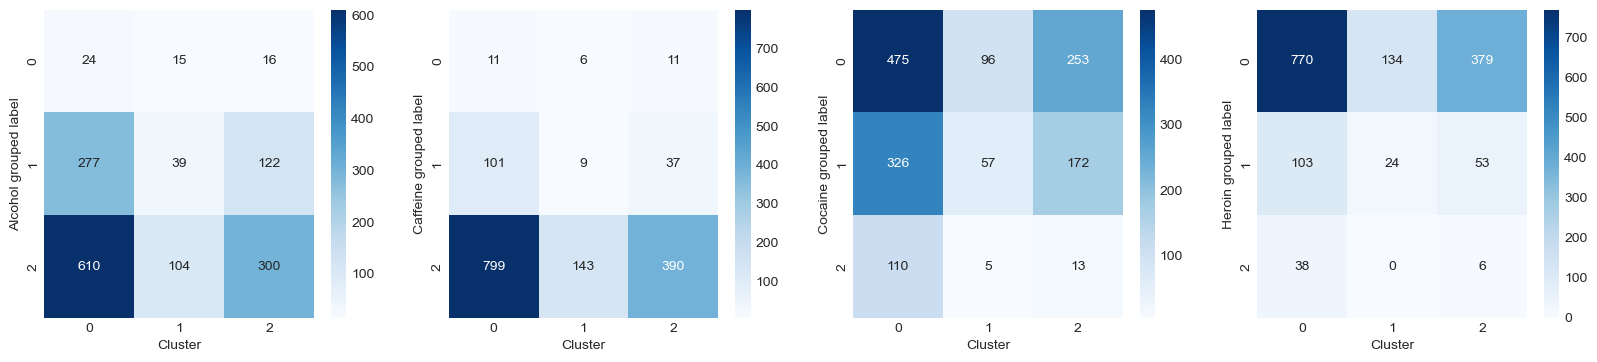

In [340]:
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(20, 4))

clustering_cm = pd.crosstab(train_set['groupedAlcohol'], train_set['cluster'], rownames=['Alcohol grouped label'], colnames=['Cluster'])
sns.heatmap(clustering_cm, annot=True, cmap="Blues", fmt='g', ax=axes[0])

clustering_cm = pd.crosstab(train_set['groupedCaffeine'], train_set['cluster'], rownames=['Caffeine grouped label'], colnames=['Cluster'])
sns.heatmap(clustering_cm, annot=True, cmap="Blues", fmt='g', ax=axes[1])

clustering_cm = pd.crosstab(train_set['groupedCoke'], train_set['cluster'], rownames=['Cocaine grouped label'], colnames=['Cluster'])
sns.heatmap(clustering_cm, annot=True, cmap="Blues", fmt='g', ax=axes[2])

clustering_cm = pd.crosstab(train_set['groupedHeroin'], train_set['cluster'], rownames=['Heroin grouped label'], colnames=['Cluster'])
sns.heatmap(clustering_cm, annot=True, cmap="Blues", fmt='g', ax=axes[3])

Because of the imbalanced targets it is hard to see if our clusters kind of correlate with the targets. Using $\chi^2$ contributions might make it easier to see.

In [341]:
show_chi2_contributions('cluster', 'groupedAlcohol')

Chi2 p-value: 0.022407546140283206


groupedAlcohol,0,1,2,All
cluster,,,,
0,2.572434,0.564314,0.014443,3.151191
1,14.785411,1.043296,0.050275,15.878981
2,0.000013,0.220817,0.094858,0.315688
All,17.357858,1.828426,0.159576,19.345860


In [342]:
show_chi2_contributions('cluster', 'groupedCaffeine')

Chi2 p-value: 0.24162605028177583


groupedCaffeine,0,1,2,All
cluster,,,,
0,2.074964,1.657595,0.047899,3.780457
1,3.198744,2.667696,0.080251,5.946690
2,1.006499,0.767035,0.021167,1.794701
All,6.280207,5.092325,0.149317,11.521849


In [343]:
show_chi2_contributions('cluster', 'groupedCoke')

Chi2 p-value: 1.3114394956386083e-05


groupedCoke,0,1,2,All
cluster,,,,
0,1.072933,0.269242,13.753635,15.095810
1,1.068660,0.024273,5.282925,6.375859
2,0.762076,0.708804,15.745108,17.215988
All,2.903669,1.002320,34.781668,38.687657


In [344]:
show_chi2_contributions('cluster', 'groupedHeroin')

Chi2 p-value: 0.09207413925758227


groupedHeroin,0,1,2,All
cluster,,,,
0,0.040279,0.310459,4.887234,5.237972
1,0.001971,1.393450,4.613139,6.008560
2,0.099923,0.008947,3.603390,3.712260
All,0.142173,1.712856,13.103762,14.958792


I am not sure this is really helpful ...

We will also try to look at the relationship between our clusters and our features.

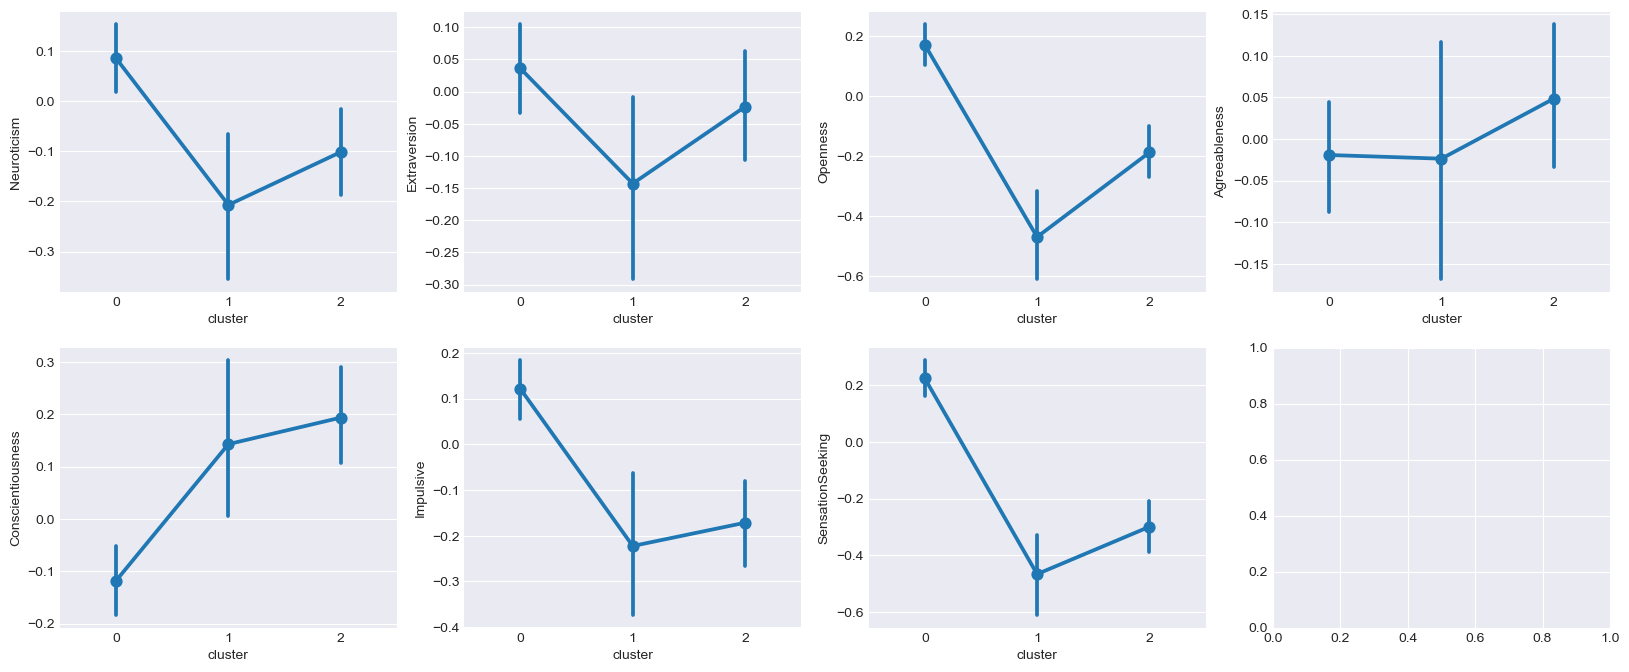

In [345]:
fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 8))
# point plot for each numerical feature against cluster
axes = axes.flatten()
for i, feature in enumerate(numericals):
    sns.pointplot(x='cluster', y=feature, data=train_set, ax=axes[i])

Variance strips often overlap but there seems to be relationships. For example cluster 1 seems to have low values of neroticism, extraversion and openness. On the other hand, cluster 0 seems to have high values of sensationseeking, impulsiveness, openness and neuroticism.

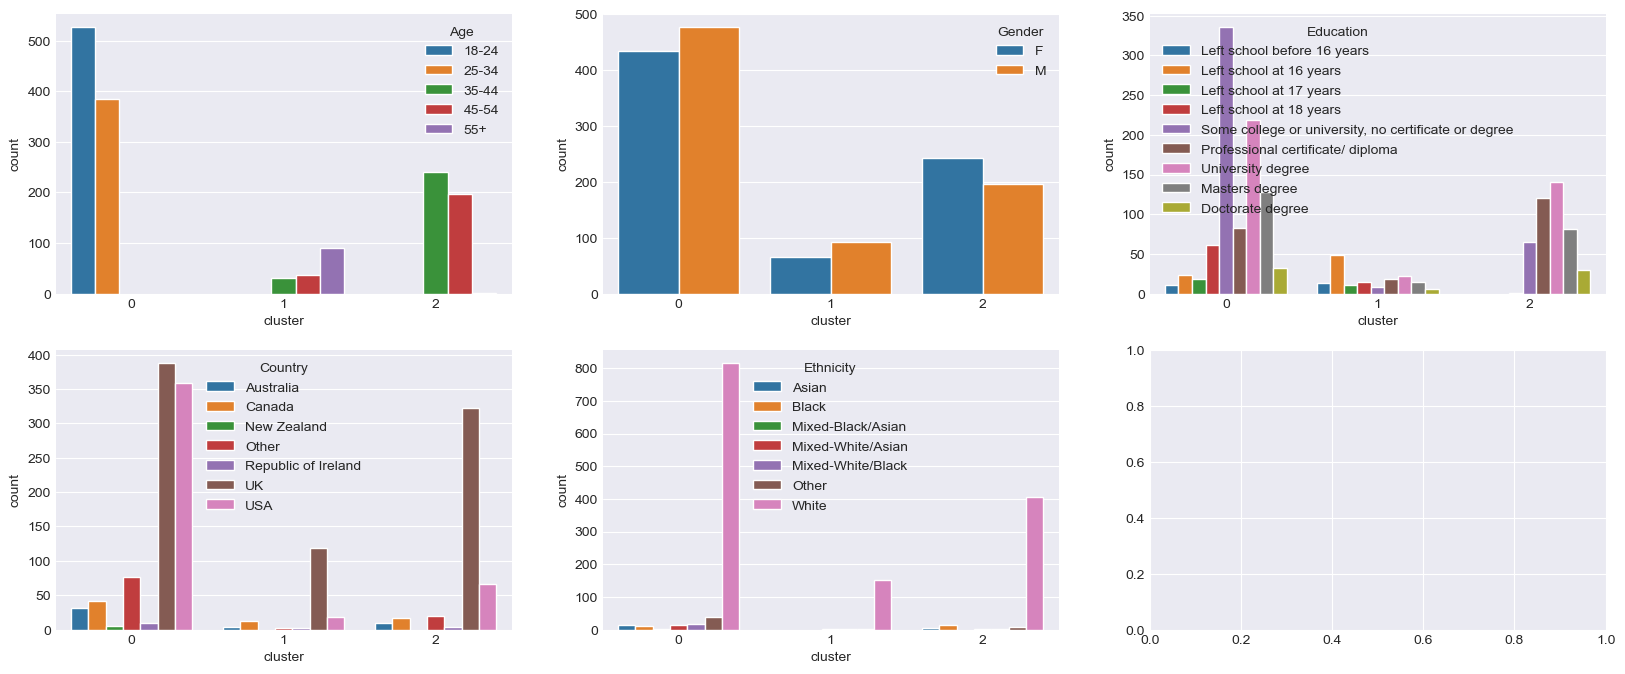

In [346]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 8))
# count plot for each categorical feature against cluster
axes = axes.flatten()
for i, feature in enumerate(categoricals):
    sns.countplot(x='cluster', hue=feature, data=train_set, ax=axes[i])

Because of imbalances, relationships are hard to see but for exampel cluster 2 seems to be composed of people going to university and cluster 0 is made of youg people.

Finally we will try to visualize our clusters on different plots of pairs of features.

<AxesSubplot: xlabel='AgeEncoded', ylabel='EducationEncoded'>

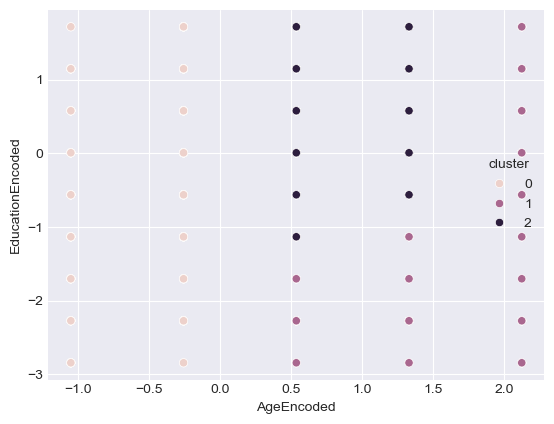

In [347]:
sns.scatterplot(x='AgeEncoded', y='EducationEncoded', hue='cluster', data=train_set)

We can see on this plot what we identified above. Cluster 0 made of youg people and the rest of people (in terms of age) are shared between clusters 1 and 2, with cluster 2 with higher education. But there are also people with high education in cluster 2 so we need more "axis" to visualize and explain the clusters.

<AxesSubplot: xlabel='Impulsive', ylabel='SensationSeeking'>

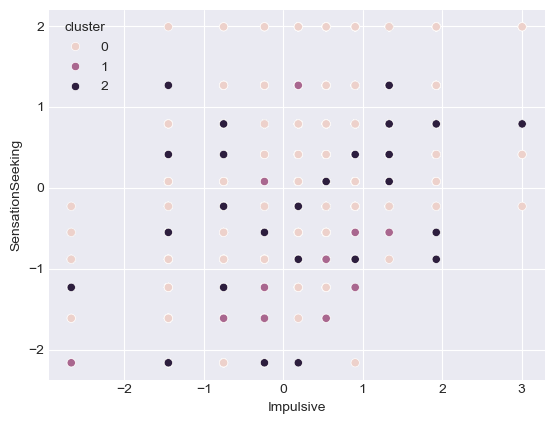

In [348]:
sns.scatterplot(x='Impulsive', y='SensationSeeking', hue='cluster', data=train_set)

I tried different plots (different features) but it is quite difficult to see anything interesting.

And finally we want to "evaluate" our clusters. For this we will use the silhouette score and silhouette plot.

For n_clusters = 3 The average silhouette_score is : 0.31344685


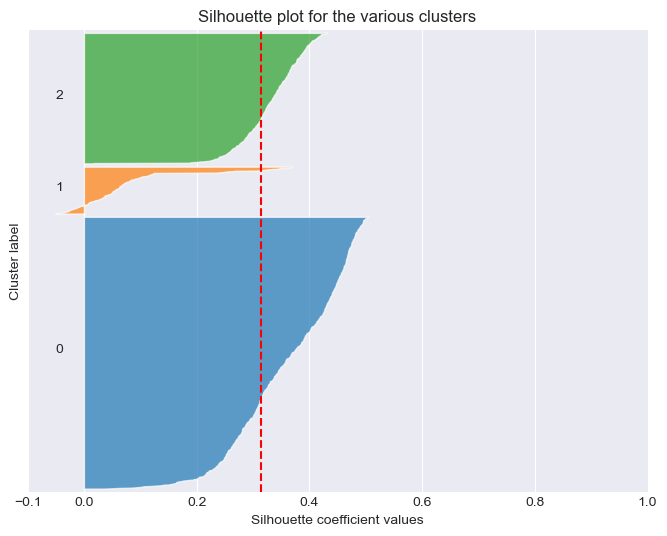

In [349]:
# silouhette plot and score
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

silhouette_avg = silhouette_score(dist_matrix, train_set['cluster'])
print("For n_clusters =", 3, "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(dist_matrix, train_set['cluster'], metric='precomputed')

# Note : this code is produced by github copilot
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(train_set) + (3 + 1) * 10])
y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[train_set['cluster'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    #color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("Silhouette plot for the various clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


The silhouette score obtained is not very good which goes with the difficult interpretability. I chose 3 clusters to see if we could see a relationships with the targets as for most of this notebook I worked with 3 classes for targets but maybe using 2 clusters would yield better results.

## 4.2 Partitional clustering

In [350]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, init="k-means++")
kmeans.fit(dist_matrix)
train_set['cluster_2'] = kmeans.labels_

train_set.cluster_2.value_counts()

/Users/matteomenager/anaconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    582
2    497
0    428
Name: cluster_2, dtype: int64

We can see that the Kmeans clusters are much more balanced, let's see how they compare to the hierarchical ones.

<AxesSubplot: xlabel='KMeans clusters', ylabel='Hierarchichal clusters'>

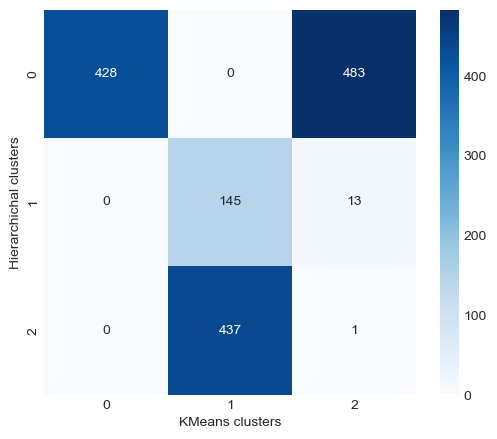

In [351]:
clustering_cm = pd.crosstab(train_set['cluster'], train_set['cluster_2'], rownames=['Hierarchichal clusters'], colnames=['KMeans clusters'])
plt.figure(figsize=(6,5))
sns.heatmap(clustering_cm, annot=True, cmap="Blues", fmt='g')


We can see that the clusters are not the same at all. All the items in the KMEANS 0 cluster were in the 0 cluster for hierarchical clustering, but the other half of the items in the hierarchical 0 cluster are in the KMEANS 2 cluster. The items of the KMEANS 1 cluster is composed of the items of the hierarchical 1 and 2 clusters.

For n_clusters = 3 The average silhouette_score is : 0.40801302


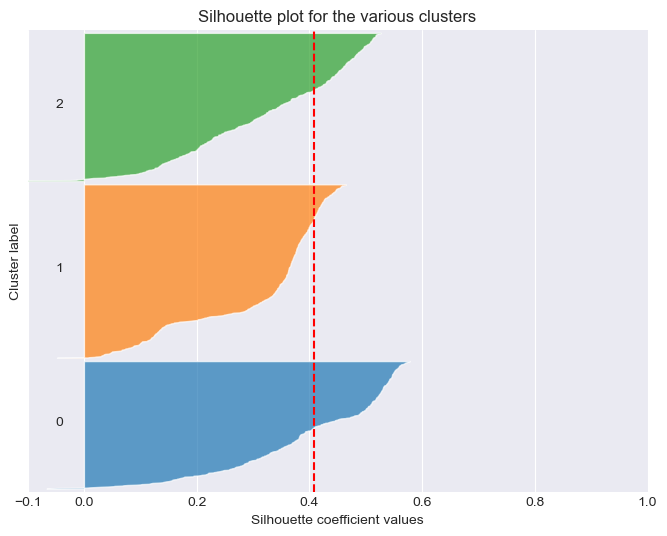

In [352]:
silhouette_avg = silhouette_score(dist_matrix, train_set['cluster_2'])
print("For n_clusters =", 3, "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(dist_matrix, train_set['cluster_2'], metric='precomputed')

# Note : this code is produced by github copilot
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(train_set) + (3 + 1) * 10])
y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[train_set['cluster_2'] == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    #color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("Silhouette plot for the various clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

If we evaluate our clusters, we get something that looks better than for hierarchical clustering. The average silouhette score is not incredible but reasonable (0.4) and the silhouette plot shows that the clusters are quite balanced.

We can try as above to see if we find some relationships with the targets or features.

In [353]:
show_chi2_contributions('cluster_2', 'groupedAlcohol')

Chi2 p-value: 0.1227927211932576


groupedAlcohol,0,1,2,All
cluster_2,,,,
0,0.839130,0.439672,0.421380,1.700181
1,3.612010,1.739714,0.179988,5.531713
2,1.455789,4.172432,1.126765,6.754985
All,5.906928,6.351819,1.728133,13.986879


In [354]:
show_chi2_contributions('cluster_2', 'groupedCaffeine')

Chi2 p-value: 0.12962175175082857


groupedCaffeine,0,1,2,All
cluster_2,,,,
0,0.138054,0.336684,0.019290,0.494029
1,2.487567,2.043575,0.060628,4.591770
2,4.208874,4.348976,0.156294,8.714144
All,6.834495,6.729235,0.236212,13.799942


In [355]:
show_chi2_contributions('cluster_2', 'groupedCoke')

Chi2 p-value: 2.481037600735781e-13


groupedCoke,0,1,2,All
cluster_2,,,,
0,3.840001,4.165667,0.521244,8.526912
1,2.423877,0.101325,21.279571,23.804773
2,12.272728,2.401149,32.056775,46.730652
All,18.536605,6.668141,53.857590,79.062337


In [356]:
show_chi2_contributions('cluster_2', 'groupedHeroin')

Chi2 p-value: 1.2137253042532034e-18


groupedHeroin,0,1,2,All
cluster_2,,,,
0,5.964116,24.129118,10.576374,40.669607
1,0.085487,0.289286,7.111257,7.486030
2,6.670305,15.811665,34.853504,57.335475
All,12.719908,40.230069,52.541135,105.491112


There may be some kind of link between users of `Coke` and `Heroin` and cluster 2. 

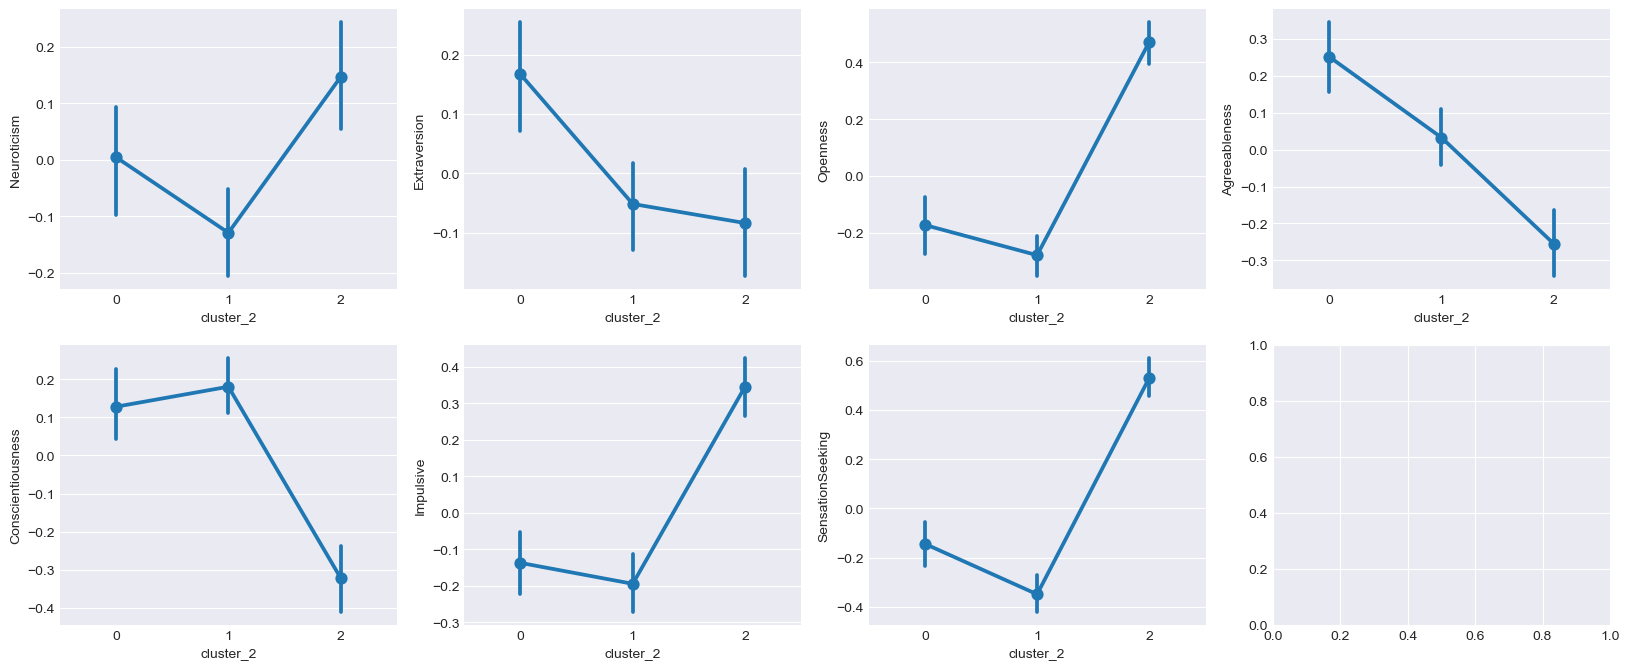

In [357]:
fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 8))
# point plot for each numerical feature against cluster
axes = axes.flatten()
for i, feature in enumerate(numericals):
    sns.pointplot(x='cluster_2', y=feature, data=train_set, ax=axes[i])

The relationships seem clearer this time especially with cluster 2 which seems to be composed of people with high levels of sensation seeking, impulsiveness, neuroticism and openness, as well as low conscientiousness, agreeableness and extraversion. Cluster 2 seems to be linked to hard drug consumption.

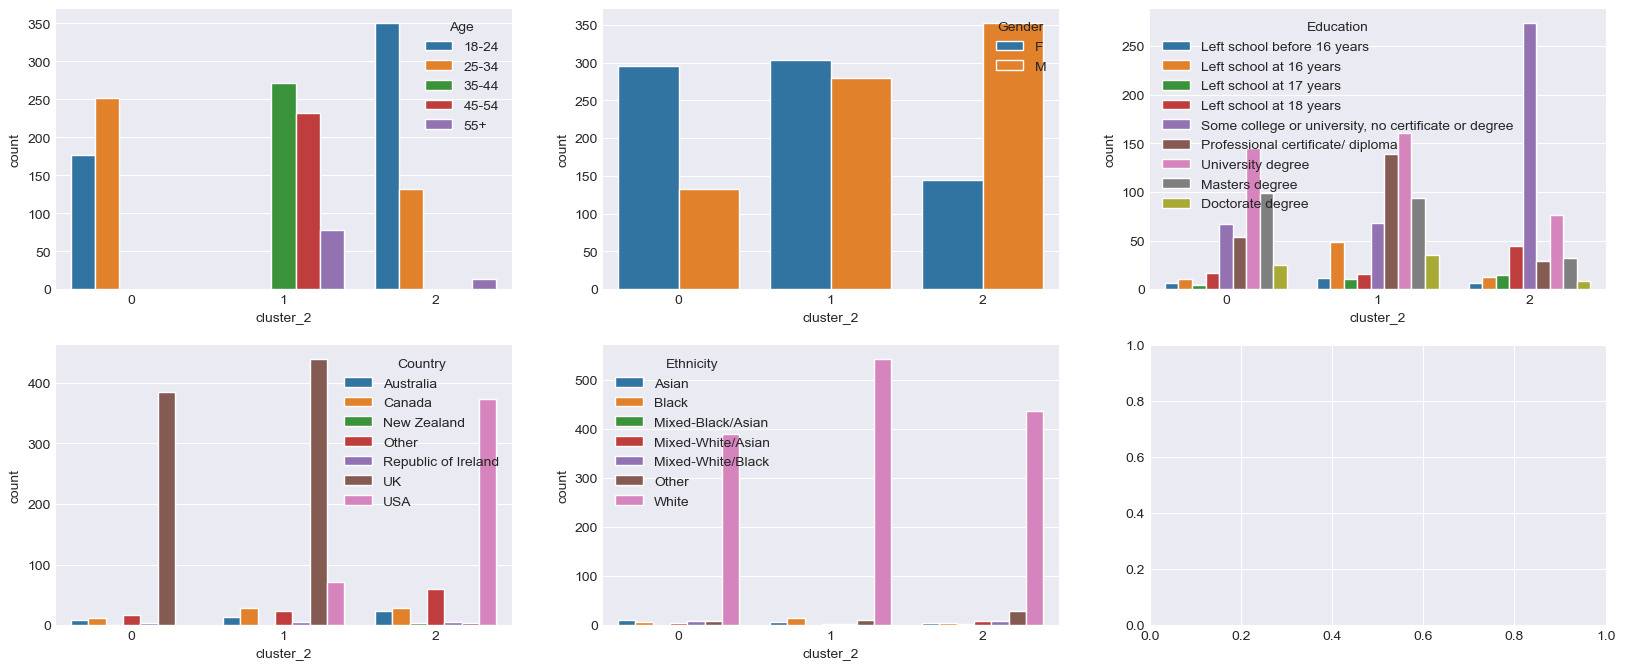

In [358]:
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 8))
# count plot for each categorical feature against cluster
axes = axes.flatten()
for i, feature in enumerate(categoricals):
    sns.countplot(x='cluster_2', hue=feature, data=train_set, ax=axes[i])

We can see that the relationships are quite different to the previous clustering. Cluster 2 is dominated by males which as we saw are more prone to use hard drugs. 

Overall KMEANS clustering seems more effective in this case with hard drugs consummers seemingly grouped in cluster 2 but other than that, I did not find any other clear relationships between clusters and features or targets. In addition, I do not feel confident claiming any insights regarding clustering as I need to study it more in depth because my understanding of all the different options and techniques is not good enough for now.